# Costa Rican Household Poverty

## Define the Problem
How can we more accurately classify the poverty levels of Costa Rican households using observeable attributes, ie education level, monthly rent, building materials, or assets, in order to predict their level of need? In order to assess the accuracy of any predictive model built, an F1 score will be used to evaluate its predictiveness.

## Identify Client
The client is the Inter-American Development Bank, who wants to assess income qualification for families in need within Costa Rica.

## Describe Dataset and How it was Cleaned/Wrangled

Dataset has 143 columns. Each record describes an individual living in Costa Rica, with attributes mostly relating to their household descriptions, education level, and location.

We filled in the missing values, combined binary columns into respective categorical columns, recoded values for easy readability, performed exploratory analysis and inferential statistics. 

We want to decide which variables to use and which to remove in order to build a classification model.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
train.columns.to_frame()

,0
Id,Id
v2a1,v2a1
hacdor,hacdor
rooms,rooms
hacapo,hacapo
v14a,v14a
refrig,refrig
v18q,v18q
v18q1,v18q1
r4h1,r4h1


## Data Cleaning

Here we create a function to clean the data. We can apply this function to clean both the training set and the test set. 

We filled in missing values for `rez_esc`, `v18q1`, `v2a1`, `meaneduc`, and `SQBmeaned`.

Then we transformed the binary columns into categorical columns related to: 
* housing situation
* education levels
* regions
* relations
* marital
* rubbish location 
* energy source
* toilets
* floor materials
* wall materials
* roof materials
* floor quality
* wall quality
* roof quality
* water provision location
* electricity source

Then recoded the values in each column for easy readability

In [5]:
nullval = train.isnull().sum().to_frame().sort_values(0, ascending = False)
nullval.head(10)

,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5
Id,0
hogar_adul,0
parentesco10,0
parentesco11,0
parentesco12,0


In [6]:
nan = train[train['rez_esc'].isnull()]
nan[['rez_esc', 'age', 'edjefe', 'edjefa', 'escolari', 'instlevel2', 'instlevel4', 'instlevel6', ]].head(20)

,rez_esc,age,edjefe,edjefa,escolari,instlevel2,instlevel4,instlevel6
0,NaN,43,10,no,10,0,1,0
1,NaN,67,12,no,12,0,0,0
2,NaN,92,no,11,11,0,0,0
4,NaN,37,11,no,11,0,0,0
5,NaN,38,11,no,11,0,0,0
8,NaN,30,9,no,9,0,1,0
9,NaN,28,9,no,11,0,0,0
11,NaN,18,no,11,12,0,0,0
12,NaN,34,no,11,11,0,0,0
13,NaN,79,no,4,4,1,0,0


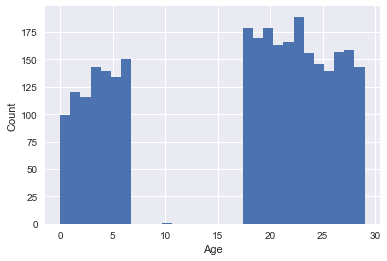

In [7]:
plt.hist(nan[nan['age']<30]['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

It seems like there is almost no one between the ages of 6 to 18, meaning that these null values are because these individuals are not in school. Therefore we can fill these values in as 0.

In [8]:
train[train['v18q1'].isnull()][['v18q1', 'v18q']].head(20)

,v18q1,v18q
0,NaN,0
2,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
11,NaN,0
12,NaN,0
15,NaN,0
16,NaN,0


In [9]:
nan = train[train['v18q1'].isnull()]
print('Households with tablets: ', sum(nan.v18q))

Households with tablets:  0


Values are only null because they have no tablets present. 

In [10]:
housing_nan = train[train['v2a1'].isnull()][['v2a1', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']]
housing_nan.sample(10)

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
5462,NaN,1,0,0,0,0
1749,NaN,1,0,0,0,0
9308,NaN,1,0,0,0,0
6700,NaN,1,0,0,0,0
5151,NaN,1,0,0,0,0
6792,NaN,0,0,0,0,1
2751,NaN,1,0,0,0,0
6549,NaN,1,0,0,0,0
4504,NaN,1,0,0,0,0
3354,NaN,1,0,0,0,0


In [11]:
housing_nan.sum()

v2a1            0.0
tipovivi1    5911.0
tipovivi2       0.0
tipovivi3       0.0
tipovivi4     163.0
tipovivi5     786.0
dtype: float64

5911 of these records own houses, 163 are precarious, and 786 are other. None are rented homes nor paying installments. We can fill these in with 0.

In [12]:
train[['meaneduc']].head(10)

,meaneduc
0,10.0
1,12.0
2,11.0
3,11.0
4,11.0
5,11.0
6,11.0
7,10.0
8,10.0
9,10.0


In [13]:
train[train['meaneduc'].isnull()][['idhogar', 'age', 'tamviv', 'rez_esc', 'escolari', 'meaneduc', 'SQBmeaned']]

,idhogar,age,tamviv,rez_esc,escolari,meaneduc,SQBmeaned
1291,1b31fd159,18,1,NaN,10,NaN,NaN
1840,a874b7ce7,18,2,NaN,6,NaN,NaN
1841,a874b7ce7,18,2,NaN,4,NaN,NaN
2049,faaebf71a,19,2,NaN,12,NaN,NaN
2050,faaebf71a,19,2,NaN,12,NaN,NaN


These are only 3 houses and none of the household members are probably still in school. Looking at tamviv they are the only members in their household. We can just take the mean of escolari for each household and put it into meaneduc then SQBmeaned.

In [14]:
def data_clean(data):
    #fill in missing values
    data['rez_esc']=data['rez_esc'].fillna(0)
    data['v18q1'] = data['v18q1'].fillna(0)
    v2a1 = data['v2a1'].sort_values()
    med = v2a1.median()
    data.loc[(data['tipovivi1']==1), 'v2a1'] = 0
    data.loc[(data['tipovivi4']==1), 'v2a1'] = med
    data.loc[(data['tipovivi5']==1), 'v2a1'] = med
    meaneduc_nan=data[data['meaneduc'].isnull()][['Id','idhogar','escolari']]
    me=meaneduc_nan.groupby('idhogar')['escolari'].mean().reset_index()
    me
    for row in meaneduc_nan.iterrows():
        idx=row[0]
        idhogar=row[1]['idhogar']
        m=me[me['idhogar']==idhogar]['escolari'].tolist()[0]
        data.at[idx, 'meaneduc']=m
        data.at[idx, 'SQBmeaned']=m*m
        
    #binary columns
    housesitu = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
    educlevels = ['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7',
             'instlevel8', 'instlevel9']
    regions = ['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']
    relations = ['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6',
            'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12']
    marital = ['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7']
    rubbish = ['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6']
    energy = ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']
    toilets = ['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6']
    floormat = ['pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera']
    wallmat = ['paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother']
    roofmat = ['techozinc', 'techoentrepiso', 'techocane', 'techootro']
    floorqual = ['eviv1', 'eviv2', 'eviv3']
    wallqual = ['epared1', 'epared2', 'epared3']
    roofqual = ['etecho1', 'etecho2', 'etecho3']
    waterprov = ['abastaguadentro', 'abastaguafuera', 'abastaguano']
    electric = ['public', 'planpri', 'noelec', 'coopele']
    
    
    #make a dictionary
    binaries = {'housesitu':housesitu,
                'educlevels':educlevels,
                'regions':regions,
                'relations':relations,
                'marital':marital,
                'rubbish':rubbish,
                'energy':energy,
                'toilets':toilets,
                'floormat':floormat,
                'wallmat':wallmat,
                'roofmat':roofmat,
                'floorqual':floorqual,
                'wallqual':wallqual,
                'roofqual':roofqual,
                'waterprov':waterprov,
                'electric':electric
               }
    
    #Replacing the binaries with categorical
    for i in binaries.keys():
        data[i] = data[binaries[i]].idxmax(axis=1)
        data.drop(data[binaries[i]], axis=1, inplace=True)
    
    #recoding values
    hs = {'tipovivi1':'Own', 
      'tipovivi2':'Own/Paying Instllmnts', 
      'tipovivi3':'Rented', 
      'tipovivi4':'Precarious', 
      'tipovivi5':'Other'}
    el = {'instlevel1':'None', 
      'instlevel2':'Incomplete Primary', 
      'instlevel3':'Complete Primary', 
      'instlevel4':'Incomplete Acad. Secondary', 
      'instlevel5':'Complete Acad. Secondary', 
      'instlevel6':'Incomplete Techn. Secondary', 
      'instlevel7':'Complete Techn. Secondary',
      'instlevel8':'Undergrad.', 
      'instlevel9':'Postgrad.'}
    rgn = {'lugar1':'Central', 
       'lugar2':'Chorotega', 
       'lugar3':'Pacafafico Central', 
       'lugar4':'Brunca', 
       'lugar5':'Huetar Atlantica', 
       'lugar6':'Huetar Norte'}
    rltn = {'parentesco1':'Household Head', 
        'parentesco2':'Spouse/Partner', 
        'parentesco3':'Son/Daughter', 
        'parentesco4':'Stepson/Daughter', 
        'parentesco5':'Son/daughter in law', 
        'parentesco6':'Grandson/daughter',
        'parentesco7':'Mother/Father', 
        'parentesco8':'Mother/father in law', 
        'parentesco9':'Brother/sister', 
        'parentesco10':'Brother/sister in law', 
        'parentesco11':'Other family member', 
        'parentesco12':'Other non-family member'}
    mrtl = {'estadocivil1':'< 10 y/o', 
        'estadocivil2':'Free or coupled union', 
        'estadocivil3':'Married', 
        'estadocivil4':'Divorced', 
        'estadocivil5':'Separated', 
        'estadocivil6':'Widow/er', 
        'estadocivil7':'Single'}
    rb = {'elimbasu1':'Tanker Truck', 
      'elimbasu2':'Botan Hollow or Buried', 
      'elimbasu3':'Burning', 
      'elimbasu4':'Thrown in unoccupied space', 
      'elimbasu5':'Thrown in river, creek, or sea', 
      'elimbasu6':'Other'}
    eng = {'energcocinar1':'None', 
       'energcocinar2':'Electricity', 
       'energcocinar3':'Gas', 
       'energcocinar4':'Wood Charcoal'}
    tlt = {'sanitario1':'None', 
       'sanitario2':'Sewer or Cesspool', 
       'sanitario3':'Septic Tank', 
       'sanitario5':'Black hole or letrine', 
       'sanitario6':'Other'}
    flmt = {'pisomoscer':'Mosaic, Ceramic', 
        'pisocemento':'Cement', 
        'pisoother':'Other', 
        'pisonatur':'Natural', 
        'pisonotiene':'None', 
        'pisomadera':'Wood'}
    wlmt = {'paredblolad':'Block/Brick', 
        'paredzocalo':'Socket (wood, zinc, absbesto)', 
        'paredpreb':'Prefabricated/cement', 
        'pareddes':'Waste', 
        'paredmad':'Wood', 
        'paredzinc':'Zinc', 
        'paredfibras':'Natural Fibers', 
        'paredother':'Other'}
    rfmt = {'techozinc':'Metal foil/Zinc', 
        'techoentrepiso':'Fiber cement', 
        'techocane':'Natural fibers', 
        'techootro':'Other'}
    flql = {'eviv1':'Bad', 
        'eviv2':'Regular', 
        'eviv3':'Good'}
    wlql = {'epared1':'Bad',
        'epared2':'Regular', 
        'epared3':'Good'}
    rfqu = {'etecho1':'Bad', 
        'etecho2':'Regular', 
        'etecho3':'Good'}
    wtrpr = {'abastaguadentro':'Inside', 
         'abastaguafuera':'Outside', 
         'abastaguano':'None'}
    elct = {'public':'Public', 
        'planpri':'Private Plant', 
        'noelec':'None', 
        'coopele':'Cooperative'}
    
    #replacing
    data.replace(dict(housesitu=hs, 
                  educlevels=el,
                  regions=rgn,
                  relations=rltn,
                  marital=mrtl,
                  rubbish=rb,
                  energy=eng,
                  toilets=tlt,
                  floormat=flmt,
                  wallmat=wlmt,
                  roofmat=rfmt,
                  floorqual=flql,
                  wallqual=wlql,
                  roofqual=rfqu,
                  waterprov=wtrpr,
                  electric=elct), inplace=True)

### *Clean Training Dataset*

In [15]:
train = pd.read_csv('train.csv')
data_clean(train)
train.to_csv('trainclean.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,energy,toilets,floormat,wallmat,roofmat,floorqual,wallqual,roofqual,waterprov,electric
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Fiber cement,Bad,Regular,Bad,Inside,Public
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,Electricity,Sewer or Cesspool,Wood,Wood,Metal foil/Zinc,Regular,Regular,Regular,Inside,Public
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Wood,Metal foil/Zinc,Good,Regular,Good,Inside,Public
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Inside,Public
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Inside,Public


In [16]:
train.shape

(9557, 71)

143 -> 71 columns

In [17]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2',
       'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize',
       'cielorazo', 'dis', 'male', 'female', 'idhogar', 'hogar_nin',
       'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe',
       'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'computer',
       'television', 'mobilephone', 'qmobilephone', 'area1', 'area2', 'age',
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target',
       'housesitu', 'educlevels', 'regions', 'relations', 'marital', 'rubbish',
       'energy', 'toilets', 'floormat', 'wallmat', 'roofmat', 'floorqual',
       'wallqual', 'roofqual', 'waterprov', 'electric'],
      dtype='object')

### *Clean Test Dataset*

In [18]:
test = pd.read_csv('test.csv')
data_clean(test)
test.to_csv('testclean.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,energy,toilets,floormat,wallmat,roofmat,floorqual,wallqual,roofqual,waterprov,electric
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Inside,Public
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Inside,Public
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Inside,Public
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Inside,Public
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Regular,Good,Inside,Public


In [19]:
train[['r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3']].describe()

,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964
std,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,3.000000
50%,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,4.000000
75%,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,4.000000,5.000000
max,5.000000,8.000000,8.000000,6.000000,6.000000,8.000000,7.000000,11.000000,13.000000


### 1 = extreme poverty 

### 2 = moderate poverty 

### 3 = vulnerable households 

### 4 = non vulnerable households

### Poverty Levels

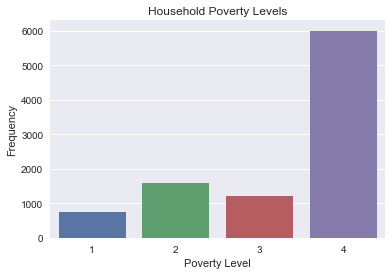

In [20]:
sns.countplot('Target',data=train)
plt.xlabel('Poverty Level')
plt.ylabel('Frequency')
plt.title('Household Poverty Levels')
plt.show()

In [21]:
train.floorqual.value_counts()

Good       6175
Regular    2416
Bad         966
Name: floorqual, dtype: int64

### Monthly Rent

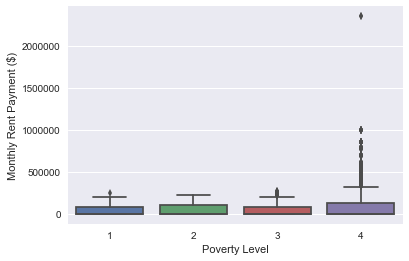

In [22]:
sns.boxplot(x='Target', y='v2a1', data=train)
plt.xlabel('Poverty Level')
plt.ylabel('Monthly Rent Payment ($)')
plt.show()

We see we have two outstanding outliers in Non Vulnerable. Also a lot of records where the housing situation is 'owned', 'precarious', and 'other'. Let's get rid of these records. to get a better look at the distribution.

In [23]:
train = train[train['v2a1'] < 400000]
trainrented = train[train['housesitu']=='Rented']

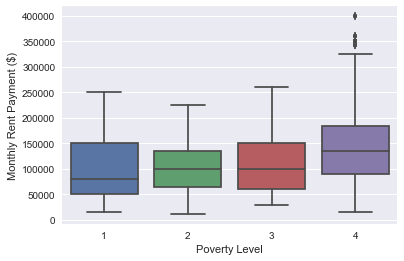

In [24]:
sns.boxplot(x='Target', y=trainrented['v2a1'], data=train)
plt.xlabel('Poverty Level')
plt.ylabel('Monthly Rent Payment ($)')
plt.show()

In [25]:
#Monthly rent summary for each poverty level
for i in train['Target'].unique():
    print(i)
    print(trainrented[(trainrented['Target'] == i)]['v2a1'].describe())
    print()

4
count      1056.000000
mean     146217.721591
std       79524.335366
min       16000.000000
25%       90000.000000
50%      135000.000000
75%      185000.000000
max      399378.000000
Name: v2a1, dtype: float64

2
count       287.000000
mean     101443.243902
std       48566.670652
min       12000.000000
25%       65000.000000
50%      100000.000000
75%      135000.000000
max      225000.000000
Name: v2a1, dtype: float64

3
count       225.000000
mean     108655.235556
std       54527.478909
min       30000.000000
25%       60000.000000
50%      100000.000000
75%      150000.000000
max      260000.000000
Name: v2a1, dtype: float64

1
count       127.000000
mean      94751.094488
std       50424.356072
min       15000.000000
25%       50000.000000
50%       80000.000000
75%      150000.000000
max      249896.000000
Name: v2a1, dtype: float64



Text(0,0.5,'Mean Monthly Rent ($)')

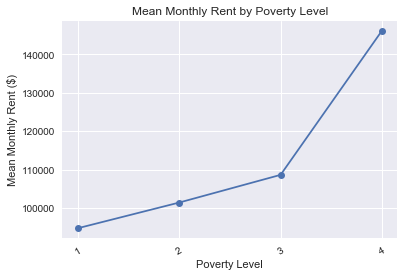

In [26]:
levels = [1,2,3,4]
rentmeans = []
for x in levels:
    mean = np.mean(trainrented[trainrented['Target']==x]['v2a1'])
    rentmeans.append(mean)

plt.plot(levels, rentmeans, marker='o')
plt.xlabel('Poverty Level')
plt.title('Mean Monthly Rent by Poverty Level')
plt.xticks(levels,rotation=30)
plt.ylabel('Mean Monthly Rent ($)')

There seems to be a positive relationship between mean monthly rent and poverty level.

### *Inferential Statistics - Difference of means*
The mean for non vulnerable households is definitely significantly larger than the other means. But what about among vulnerable, moderate poverty, and extreme poverty?

We will perform a hypothesis test using a t test.

**Null Hypothesis** : There is NO significant difference between the means.
Alpha = 0.05

In [27]:
#non vulnerable
meanV = np.mean(trainrented[trainrented['Target'] == 4]['v2a1'])
print('Non Vulnerable Mean Rent: ', meanV)

#vulnerable
meanV = np.mean(trainrented[trainrented['Target'] == 3]['v2a1'])
print('Vulnerable Mean Rent: ', meanV)

#moderate
meanM = np.mean(trainrented[trainrented['Target'] == 2]['v2a1'])
print('Moderate Mean Rent: ', meanM)

#extreme
meanE = np.mean(trainrented[trainrented['Target'] == 1]['v2a1'])
print('Extreme Mean Rent: ', meanE)

#total
meanTot = np.mean(trainrented['v2a1'])
print('Mean Rent of Total: ', meanTot)

Non Vulnerable Mean Rent:  146217.7215909091
Vulnerable Mean Rent:  108655.23555555556
Moderate Mean Rent:  101443.24390243902
Extreme Mean Rent:  94751.09448818897
Mean Rent of Total:  129794.06607669617


In [28]:
#non vulnerable and vulnerable
from statsmodels.stats.weightstats import ztest
tstat, p = ztest(trainrented[trainrented['Target'] == 4]['v2a1'],
                           trainrented[trainrented['Target'] == 3]['v2a1'])
print('T Stat: ', tstat)
print('P-Value: ', p)

T Stat:  6.753840073837967
P-Value:  1.4398245534765238e-11


Here we reject the null hypothesis as our p-value is significantly lower than alpha. There is a significant difference between the mean monthly rent of the non vulnerable and vulnerable level.

In [29]:
#vulnerable and moderate
tstat, p = ztest(trainrented[trainrented['Target'] == 3]['v2a1'],
                           trainrented[trainrented['Target'] == 2]['v2a1'])
print('T Stat: ', tstat)
print('P-Value: ', p)

T Stat:  1.5797475452468637
P-Value:  0.11416469256908535


We fail to reject the null hypothesis as our p-value here is greater than alpha. There is not a significant difference between the mean montly rent of the vulnerable level and moderate level.

In [30]:
#moderate and extreme
tstat, p = ztest(trainrented[trainrented['Target'] == 2]['v2a1'],
                           trainrented[trainrented['Target'] == 1]['v2a1'])
print('T Stat: ', tstat)
print('P-Value: ', p)

T Stat:  1.277771531367256
P-Value:  0.20132999507448912


We fail to reject the null hypothesis as our p-value here is greater than alpha. There is not a significant difference between the mean montly rent of the vulnerable level and moderate level.

Non vulnerable has a lot more variance in monthy payments and also the highest mean. Monthly rent seems to increase as the poverty level gets better. Monthly rent seems to be a significant indicator of poverty level.

### Roof, floor, and wall materials

In [31]:
#proportion chart to compare normalized data among target levels for each feature.
def percent_table(x):
    return x/float(x[-1])

def prop_chart(column, title):
    df = pd.crosstab(train['Target'], train[column], margins=True).apply(percent_table, axis=1)
    df.iloc[:-1,:-1].plot(kind='bar')
    plt.legend(loc=0, fontsize='x-small')
    plt.title(title)

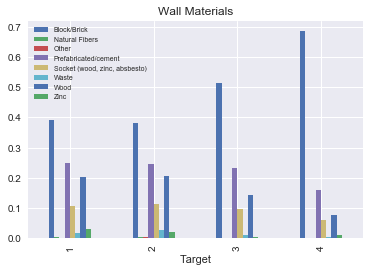

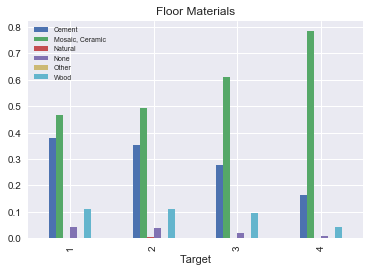

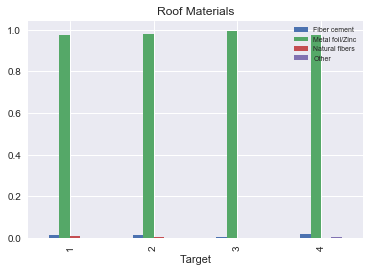

In [32]:
prop_chart('wallmat', 'Wall Materials')

prop_chart('floormat', 'Floor Materials')

prop_chart('roofmat', 'Roof Materials')

* Most walls are made of brick/block; Non Vulnerable significantly so.
* Most floors are made of Mosaic/Ceramic. Second most is Cement. Third most is wood.
* Over 90-97% of roofs are Metal foil/zinc

Poverty levels seem to have similar distributions for wall, floor, and roof materials. 

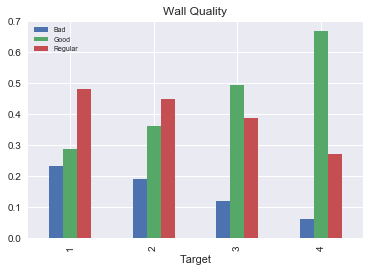

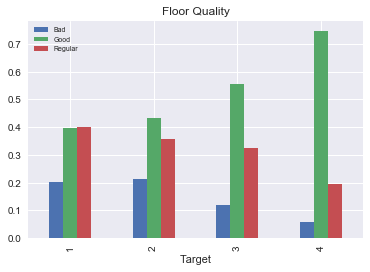

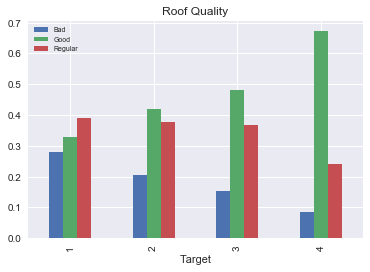

In [33]:
#quality
#create crosstab dataframes 
prop_chart('wallqual', 'Wall Quality')
prop_chart('floorqual', 'Floor Quality')
prop_chart('roofqual', 'Roof Quality')

* In Non Vulnerable and Vulnerable houses, a greater proportion of them have Good quality than Regular, or Bad. 
    * Vulnerable households consistently have 45-55% with good quality materials, and Non Vulnerable households consistently have over 65% with good quality materials.
    * Between 8-20% of these households have materials considered Bad quality.
* In Extreme and Moderate Poverty houses, a lesser proportion of them have Good quality than Regular, or Bad.
    * Between 20-30% of these households have materials considered Bad quality.
    * Between 35-50% of these households have materials considere Good Quality.
    
Wall, Floor, and Roof quality seems to be a strong indicator of Poverty Level.

### *Inferential Statistics - Difference in proportions*
Is there a difference between the proportions among the poverty levels for Good, Regular, and Bad quality materials (wall, floor, roof)? We will perform two sample Z tests to test significance.

**Null hypothesis**: There is not a significant difference in proportion for quality.

Alpha = 0.05

In [34]:
#ztest proportion
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings("ignore")

def propztest_poverty(data, column, val): 
    
    nonvuln = data[data.Target==4]
    vuln = data[data.Target==3]
    moder = data[data.Target==2]
    extreme = data[data.Target==1]
    
    n1 = len(extreme)
    n2 = len(moder)
    n3 = len(vuln)
    n4 = len(nonvuln)
    s1 = len(extreme[data[column]==val])
    s2 = len(moder[data[column]==val])
    s3 = len(vuln[data[column]==val])
    s4 = len(nonvuln[data[column]==val])
    
    #nonvuln and vuln
    z1, pval1 = proportions_ztest([s4, s3], [n4, n3])
    print('Nonvuln proportion:', s4/n4)
    print('Vuln proportion:', s3/n3)
    print('Non Vulnerable and Vulnerable: [zscore, P-Value]', 
          ['{:.12f}'.format(b) for b in (z1, pval1)])
    if pval1 < 0.05:
        print('Significant')
    else:
        print('Not significant')
    
    #vuln and moder
    z2, pval2 = proportions_ztest([s3, s2], [n3, n2])
    print('Vuln proportion:', s3/n3)
    print('Moderate proportion:', s2/n2)
    print('Vulnerable and Moderate: [zscore, P-Value]', 
          ['{:.12f}'.format(b) for b in (z2, pval2)])
    if pval2 < 0.05:
        print('Significant')
    else:
        print('Not significant')
        
    #moder and extreme
    z3, pval3 = proportions_ztest([s2, s1], [n2, n1])
    print('Moderate proportion', s2/n2)
    print('Extreme proportion', s1/n1)
    print('Moderate and Extreme: [zscore, P-Value]', 
          ['{:.12f}'.format(b) for b in (z3, pval3)])
    if pval3 < 0.05:
        print('Significant')
    else:
        print('Not significant')

#Floors
print('Floor Quality')
for x in train['floorqual'].unique():
    
    print(x)
    propztest_poverty(train, 'floorqual', x)
    print()

Floor Quality
Bad
Nonvuln proportion: 0.05674978503869303
Vuln proportion: 0.11993382961124896
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-7.960738976710', '0.000000000000']
Significant
Vuln proportion: 0.11993382961124896
Moderate proportion: 0.21227301189730746
Vulnerable and Moderate: [zscore, P-Value] ['-6.411234729233', '0.000000000144']
Significant
Moderate proportion 0.21227301189730746
Extreme proportion 0.20132450331125828
Moderate and Extreme: [zscore, P-Value] ['0.609937904340', '0.541902942333']
Not significant

Regular
Nonvuln proportion: 0.19673258813413586
Vuln proportion: 0.32588916459884204
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-9.880768331269', '0.000000000000']
Significant
Vuln proportion: 0.32588916459884204
Moderate proportion: 0.35629304946775203
Vulnerable and Moderate: [zscore, P-Value] ['-1.679819854192', '0.092992371018']
Not significant
Moderate proportion 0.35629304946775203
Extreme proportion 0.4
Moderate and Extreme: [zscore, P-Value] 

6/9 instances of significance. Though some compared proportions here are not significant, there is enough evidence to deduce that there is significance among proportions for Floor Quality of each poverty level. 

In [35]:
#Wall Quality
print('Wall Quality')
for x in train['wallqual'].unique():
    print(x)
    propztest_poverty(train, 'wallqual', x)
    print()

Wall Quality
Regular
Nonvuln proportion: 0.271195184866724
Vuln proportion: 0.38626964433416044
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-8.015010356981', '0.000000000000']
Significant
Vuln proportion: 0.38626964433416044
Moderate proportion: 0.4477144646211647
Vulnerable and Moderate: [zscore, P-Value] ['-3.264321830834', '0.001097264504']
Significant
Moderate proportion 0.4477144646211647
Extreme proportion 0.48079470198675495
Moderate and Extreme: [zscore, P-Value] ['-1.503208127783', '0.132785382269']
Not significant

Good
Nonvuln proportion: 0.6675838349097163
Vuln proportion: 0.4946236559139785
Non Vulnerable and Vulnerable: [zscore, P-Value] ['11.384889688947', '0.000000000000']
Significant
Vuln proportion: 0.4946236559139785
Moderate proportion: 0.36192861615529115
Vulnerable and Moderate: [zscore, P-Value] ['7.054506982836', '0.000000000002']
Significant
Moderate proportion 0.36192861615529115
Extreme proportion 0.28741721854304636
Moderate and Extreme: [zscore, P-Va

8/9 instances of signifance. There is enough evidence to deduce that there is significant differences among the poverty levels for wall quality.

In [36]:
#Roof Quality
print('Roof Quality')
for x in train['roofqual'].unique():
    print(x)
    propztest_poverty(train, 'roofqual', x)
    print()

Roof Quality
Bad
Nonvuln proportion: 0.08564058469475494
Vuln proportion: 0.15301902398676592
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-7.194688243205', '0.000000000001']
Significant
Vuln proportion: 0.15301902398676592
Moderate proportion: 0.2047589229805886
Vulnerable and Moderate: [zscore, P-Value] ['-3.514012735473', '0.000441391650']
Significant
Moderate proportion 0.2047589229805886
Extreme proportion 0.27947019867549666
Moderate and Extreme: [zscore, P-Value] ['-4.027364758432', '0.000056405492']
Significant

Regular
Nonvuln proportion: 0.2416165090283749
Vuln proportion: 0.36724565756823824
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-9.024996561032', '0.000000000000']
Significant
Vuln proportion: 0.36724565756823824
Moderate proportion: 0.37570444583594237
Vulnerable and Moderate: [zscore, P-Value] ['-0.459054654000', '0.646194918960']
Not significant
Moderate proportion 0.37570444583594237
Extreme proportion 0.39072847682119205
Moderate and Extreme: [zscore, 

7/9 instances of significance. There is enough evidence to deduce significant differences among the poverty levels for roof quality.

**Wall, Floor, and Roof Quality seems to be a strong indicator of poverty level.**

### Education

`educlevels`

The different education levels among poverty levels. 

In [37]:
educdf = pd.crosstab(index=train['Target'], columns=train['educlevels'], margins=True).apply(percent_table,axis=1)
educdf

educlevels,Complete Acad. Secondary,Complete Primary,Complete Techn. Secondary,Incomplete Acad. Secondary,Incomplete Primary,Incomplete Techn. Secondary,None,Postgrad.,Undergrad.,All
Target,,,,,,,,,,
1,0.072848,0.185430,0.011921,0.166887,0.276821,0.015894,0.245033,0.000000,0.025166,1.0
2,0.075767,0.233563,0.006262,0.177207,0.259236,0.018785,0.197245,0.000626,0.031309,1.0
3,0.087676,0.252275,0.008271,0.196030,0.215054,0.025641,0.166253,0.000827,0.047974,1.0
4,0.134652,0.199484,0.019604,0.191402,0.126741,0.016337,0.097163,0.020636,0.193981,1.0
All,0.113588,0.210964,0.015252,0.187607,0.172782,0.017918,0.135026,0.013012,0.133852,1.0


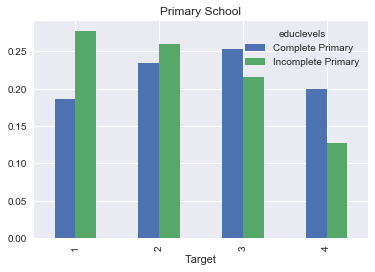

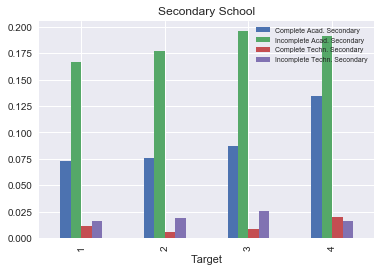

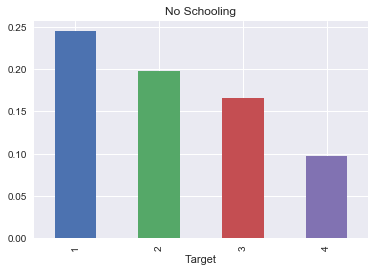

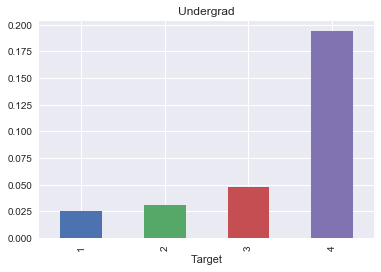

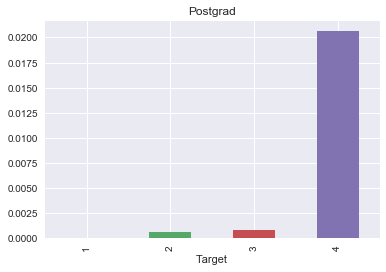

In [38]:
primary = educdf[['Complete Primary', 'Incomplete Primary']]
secondary = educdf[['Complete Acad. Secondary', 'Incomplete Acad. Secondary',
                   'Complete Techn. Secondary', 'Incomplete Techn. Secondary']]
none = educdf['None']
undergrad = educdf['Undergrad.']
postgrad = educdf['Postgrad.']

primary.iloc[:-1].plot(kind='bar')
plt.title('Primary School')
plt.show()

secondary.iloc[:-1].plot(kind='bar')
plt.title('Secondary School')
plt.legend(fontsize='x-small')
plt.show()

none.iloc[:-1].plot(kind='bar')
plt.title('No Schooling')
plt.show()

undergrad.iloc[:-1].plot(kind='bar')
plt.title('Undergrad')
plt.show()

postgrad.iloc[:-1].plot(kind='bar')
plt.title('Postgrad')
plt.show()

Findings:

* Non Vulnerable and Vulnerable have higher proportions of completing primary school, while Moderate and Extreme have higher proportions of not completing primary school.
* All poverty levels have higher proportions of not completing academic secondary school. Proportion of completing academic secondary school goes up as poverty level becomes less vulnerable. Only Non Vulnerable has higher proportion of completing technical primary school than not completing.
* Proportion of having no schooling goes down as poverty level becomes less vulnerable.
* Proportion of completing undergrad and postgrad goes up as poverty level becomes less vulnerable.
* Non Vulnerable seems to have significant increase in proportion of completing undergrad and postgrad compared to other levels.

### *Inferential Statistics - Difference in proportions*
Is there a difference in proportions among the poverty levels for the different education levels? We will perform a two sample proportions Z tests to test significance. 

**Null hypothesis:** There is no significant difference between the proportions.

Alpha = 0.05

In [39]:
print('Education Levels')
for x in train.educlevels.unique():
    print(x)
    propztest_poverty(train, 'educlevels', x)
    print()

Education Levels
Incomplete Acad. Secondary
Nonvuln proportion: 0.19140154772141016
Vuln proportion: 0.19602977667493796
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-0.371606709144', '0.710185693104']
Not significant
Vuln proportion: 0.19602977667493796
Moderate proportion: 0.17720726361928615
Vulnerable and Moderate: [zscore, P-Value] ['1.270712388663', '0.203830986617']
Not significant
Moderate proportion 0.17720726361928615
Extreme proportion 0.16688741721854305
Moderate and Extreme: [zscore, P-Value] ['0.616481107166', '0.537577037365']
Not significant

Undergrad.
Nonvuln proportion: 0.1939810834049871
Vuln proportion: 0.04797353184449959
Non Vulnerable and Vulnerable: [zscore, P-Value] ['12.330514260312', '0.000000000000']
Significant
Vuln proportion: 0.04797353184449959
Moderate proportion: 0.031308703819661866
Vulnerable and Moderate: [zscore, P-Value] ['2.272361526962', '0.023064683443']
Significant
Moderate proportion 0.031308703819661866
Extreme proportion 0.0251655629

13/27 instances of significance. There is enough evidence to deduce significance among the poverty levels for each education level.

**Education level seems to be a strong indicator of poverty level.**

### Overcrowding

`hacapo` = Overcrowding by rooms.
`hacdor` = Overcrowding by bedrooms.
* 1 = Yes
* 0 = No

In [40]:
train.hacapo.describe()

count    9376.000000
mean        0.024104
std         0.153381
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hacapo, dtype: float64

Text(0,0.5,'Proportion')

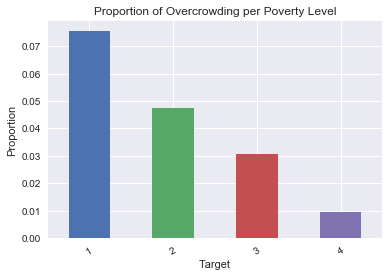

In [41]:
overcrowdf = pd.crosstab(train['Target'], train['hacapo'], margins=True).apply(percent_table, axis=1)
overcrowdf.iloc[:-1, 1].plot(kind='bar', stacked=True)
plt.xticks(rotation=30)
plt.title('Proportion of Overcrowding per Poverty Level')
plt.ylabel('Proportion')

In [42]:
overcrowdf

hacapo,0,1,All
Target,,,
1,0.924503,0.075497,1.0
2,0.952411,0.047589,1.0
3,0.969396,0.030604,1.0
4,0.990370,0.009630,1.0
All,0.975896,0.024104,1.0


The proportion of overcrowding by room decreases as the poverty level becomes less vulnerable.

In [43]:
#overcrowding by room 
train.hacapo.head()

0    0
1    0
2    0
3    0
4    0
Name: hacapo, dtype: int64

`hacapo` is probably not worth looking at, as distribution is all very close to 0.

In [44]:
#overcrowding by bedroom
train.hacdor.head()

0    0
1    0
2    0
3    0
4    0
Name: hacdor, dtype: int64

Text(0,0.5,'Proportion')

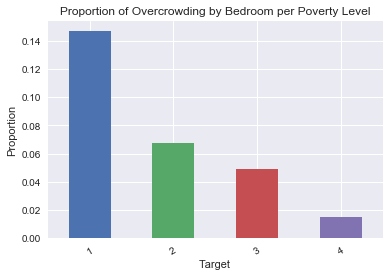

In [45]:
overcrowdf = pd.crosstab(train['Target'], train['hacdor'], margins=True).apply(percent_table, axis=1)
overcrowdf.iloc[:-1, 1].plot(kind='bar', stacked=True)
plt.xticks(rotation=30)
plt.title('Proportion of Overcrowding by Bedroom per Poverty Level')
plt.ylabel('Proportion')

Proportion of overcrowding by bedroom decreases as poverty level becomes less vulnerable. This proportion is almost twice as much as overcrowding by room. 

### *Inferential Statistics - Difference in proportions*
Is there a difference in proportions among the poverty levels for overcrowding? We will perform a two sample proportions Z tests to test significance.

**Null hypothesis:** There is no significant difference between the proportions.

Alpha = 0.05

In [46]:
print('overcrowding by room')
propztest_poverty(train, 'hacapo', 1)
print()

print('overcrowding by bedroom')
propztest_poverty(train, 'hacdor', 1)

overcrowding by room
Nonvuln proportion: 0.009630266552020636
Vuln proportion: 0.030603804797353185
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-5.805137889943', '0.000000006431']
Significant
Vuln proportion: 0.030603804797353185
Moderate proportion: 0.047589229805886035
Vulnerable and Moderate: [zscore, P-Value] ['-2.266357730556', '0.023429489405']
Significant
Moderate proportion 0.047589229805886035
Extreme proportion 0.07549668874172186
Moderate and Extreme: [zscore, P-Value] ['-2.735649260140', '0.006225734461']
Significant

overcrowding by bedroom
Nonvuln proportion: 0.014789337919174549
Vuln proportion: 0.04880066170388751
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-7.567582101994', '0.000000000000']
Significant
Vuln proportion: 0.04880066170388751
Moderate proportion: 0.06762680025046963
Vulnerable and Moderate: [zscore, P-Value] ['-2.087337913964', '0.036857599874']
Significant
Moderate proportion 0.06762680025046963
Extreme proportion 0.14701986754966886
Modera

6/6 instances of significance. There is enough evidence to deduce significant differences among the proportion for each poverty level with both overcrowding by room and by bedroom. Is there a strong correlation between these two variables? If so, we can remove one.


In [47]:
from scipy.stats import pearsonr
corr1 = pearsonr(train.hacapo, train.hacdor)
print('hacapo x hacdor: ', corr1)

corr2 = pearsonr(train.Target, train.hacapo)
print('Target x hacapo: ', corr2)

corr3 = pearsonr(train.Target, train.hacdor)
print('Target x hacdor: ', corr3)

hacapo x hacdor:  (0.6523975407868386, 0.0)
Target x hacapo:  (-0.13659466371093892, 2.754663114162609e-40)
Target x hacdor:  (-0.19000967940810662, 6.110632411659773e-77)


With an correlation coefficient of 0.6524, `hacapo` and `hacdor` have a moderately strong relationship with each other. 

### Water Provision

`waterprov`

If water provisions are inside, outside, or not present at the household.

Text(0,0.5,'Proportion')

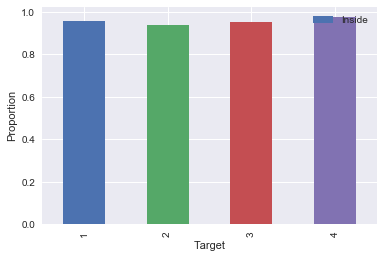

In [48]:
#inside
waterprovdf = pd.crosstab(train['Target'], train['waterprov'], margins=True).apply(percent_table, axis=1)
waterprovdf.iloc[:-1, 0].plot(kind='bar', stacked=True)
plt.legend()
plt.ylabel('Proportion')

Text(0,0.5,'Proportion')

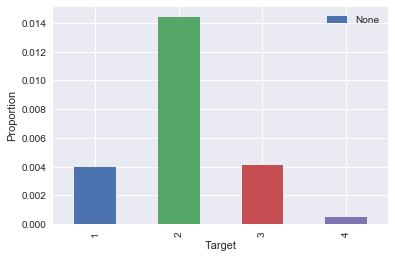

In [49]:
#none
waterprovdf.iloc[:-1, 1].plot(kind='bar', stacked=True)
plt.legend()
plt.ylabel('Proportion')

Text(0,0.5,'Proportion')

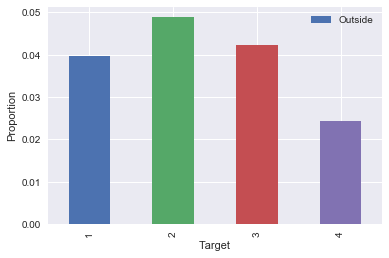

In [50]:
#outside
waterprovdf.iloc[:-1, 2].plot(kind='bar', stacked=True)
plt.legend()
plt.ylabel('Proportion')

In [51]:
waterprovdf

waterprov,Inside,None,Outside,All
Target,,,,
1,0.956291,0.003974,0.039735,1.0
2,0.936756,0.014402,0.048842,1.0
3,0.953681,0.004136,0.042184,1.0
4,0.975064,0.000516,0.024420,1.0
All,0.964270,0.003626,0.032103,1.0


In [52]:
for x in train['waterprov'].unique():
    print(x)
    propztest_poverty(train, 'waterprov', x)
    print()

Inside
Nonvuln proportion: 0.9750644883920895
Vuln proportion: 0.9536807278742763
Non Vulnerable and Vulnerable: [zscore, P-Value] ['4.057687798672', '0.000049560960']
Significant
Vuln proportion: 0.9536807278742763
Moderate proportion: 0.936756418284283
Vulnerable and Moderate: [zscore, P-Value] ['1.931655155855', '0.053402083224']
Not significant
Moderate proportion 0.936756418284283
Extreme proportion 0.9562913907284768
Moderate and Extreme: [zscore, P-Value] ['-1.908201467239', '0.056365182072']
Not significant

Outside
Nonvuln proportion: 0.024419604471195185
Vuln proportion: 0.04218362282878412
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-3.437958876694', '0.000586116703']
Significant
Vuln proportion: 0.04218362282878412
Moderate proportion: 0.048841577958672514
Vulnerable and Moderate: [zscore, P-Value] ['-0.833933202026', '0.404318626254']
Not significant
Moderate proportion 0.048841577958672514
Extreme proportion 0.039735099337748346
Moderate and Extreme: [zscore, P-Val

Does not seem to be a significant difference in proportion of whether water provisions are inside or outside dwellings among poverty levels. None might be an indicator they are in moderate poverty, or just no information.


### Regions

`regions`

Different regions that the households reside in. 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

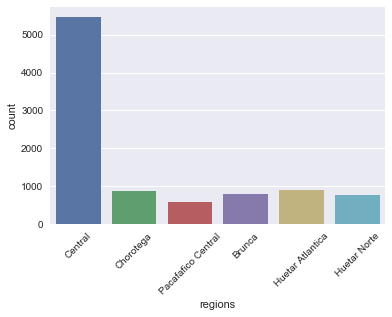

In [53]:
sns.countplot('regions', data=train)
plt.xticks(rotation=45)

In [54]:
train['regions'].value_counts()

Central               5458
Huetar Atlantica       897
Chorotega              870
Brunca                 791
Huetar Norte           771
Pacafafico Central     589
Name: regions, dtype: int64

Majority of households are located in the Central region. 

In [55]:
regionsdf = pd.crosstab(train['regions'], train['Target'])
regionsdf

Target,1,2,3,4
regions,,,,
Brunca,98,175,112,406
Central,325,752,616,3765
Chorotega,77,161,117,515
Huetar Atlantica,103,213,143,438
Huetar Norte,69,168,109,425
Pacafafico Central,83,128,112,266


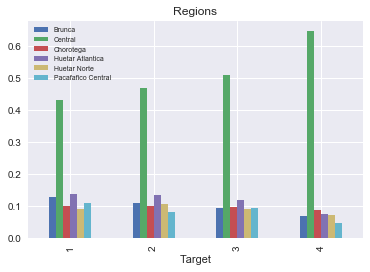

In [56]:
prop_chart('regions', 'Regions')

### *Inferential Statistics - Difference in Proportions*

Is there a difference in proportions among the poverty levels for overcrowding? We will perform a two sample proportions Z tests to test significance.

Null hypothesis: There is no significant difference between the proportions.

Alpha = 0.05

In [57]:
for x in train['regions'].unique():
    print(x)
    propztest_poverty(train, 'regions', x)
    print()

Central
Nonvuln proportion: 0.647463456577816
Vuln proportion: 0.5095119933829612
Non Vulnerable and Vulnerable: [zscore, P-Value] ['9.008891666454', '0.000000000000']
Significant
Vuln proportion: 0.5095119933829612
Moderate proportion: 0.47088290544771444
Vulnerable and Moderate: [zscore, P-Value] ['2.027222437329', '0.042639669523']
Significant
Moderate proportion 0.47088290544771444
Extreme proportion 0.4304635761589404
Moderate and Extreme: [zscore, P-Value] ['1.836837559327', '0.066233879369']
Not significant

Chorotega
Nonvuln proportion: 0.0885640584694755
Vuln proportion: 0.0967741935483871
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-0.907723630838', '0.364024255677']
Not significant
Vuln proportion: 0.0967741935483871
Moderate proportion: 0.1008140262993112
Vulnerable and Moderate: [zscore, P-Value] ['-0.354700576855', '0.722813918736']
Not significant
Moderate proportion 0.1008140262993112
Extreme proportion 0.10198675496688742
Moderate and Extreme: [zscore, P-Value] 

Difference in proportions between Non vulnerable and Vulnerable households are consistently significant. However, the two other comparisons,  vulnerable/moderate, and moderate/extreme are consistently non significant. Regions may not be a significant factor in determining poverty level.

### Relations

Son/Daughter               3580
Household Head             2914
Spouse/Partner             1716
Grandson/daughter           489
Brother/sister              125
Other family member         119
Stepson/Daughter            116
Mother/Father                93
Son/daughter in law          91
Other non-family member      81
Brother/sister in law        29
Mother/father in law         23
Name: relations, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

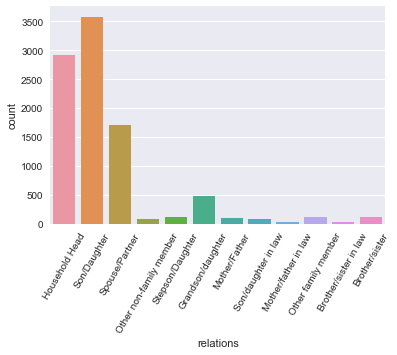

In [58]:
print(train['relations'].value_counts())
sns.countplot('relations', data=train)
plt.xticks(rotation=60)

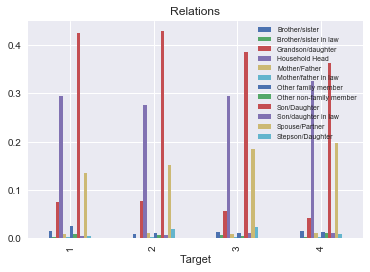

In [59]:
prop_chart('relations', 'Relations')

* Brother/sister in law and stepson/daughter are significantly more present in Vulnerable households than other relations.
* Grandson/daughter and stepson/daughter significantly less apparent Non Vulnerable households, but more apparent in Moderate Poverty households.

### Inferential Statistics - Difference in Proportions
Is there a significant difference in proportions among the poverty levels for the different relations? We will perform a two sample proportions Z tests to test significance.

**Null hypothesis**: There is no significant difference between the proportions.

Alpha = 0.05

In [60]:
for x in train['relations'].unique():
    print(x)
    propztest_poverty(train, 'relations', x)
    print()

Household Head
Nonvuln proportion: 0.32588134135855545
Vuln proportion: 0.293631100082713
Non Vulnerable and Vulnerable: [zscore, P-Value] ['2.186657495276', '0.028767536707']
Significant
Vuln proportion: 0.293631100082713
Moderate proportion: 0.2767689417658109
Vulnerable and Moderate: [zscore, P-Value] ['0.980851984948', '0.326665738286']
Not significant
Moderate proportion 0.2767689417658109
Extreme proportion 0.29403973509933773
Moderate and Extreme: [zscore, P-Value] ['-0.868733600100', '0.384992858855']
Not significant

Son/Daughter
Nonvuln proportion: 0.3625107480653482
Vuln proportion: 0.3854425144747725
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-1.505682815876', '0.132148617362']
Not significant
Vuln proportion: 0.3854425144747725
Moderate proportion: 0.4289292423293676
Vulnerable and Moderate: [zscore, P-Value] ['-2.319153590075', '0.020386709877']
Significant
Moderate proportion 0.4289292423293676
Extreme proportion 0.4251655629139073
Moderate and Extreme: [zscore, 

Not a lot of evidence indicating significance. 

### Toilets
What toilet is connected to.

Septic Tank              7187
Sewer or Cesspool        1981
Black hole or letrine     147
None                       37
Other                      24
Name: toilets, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

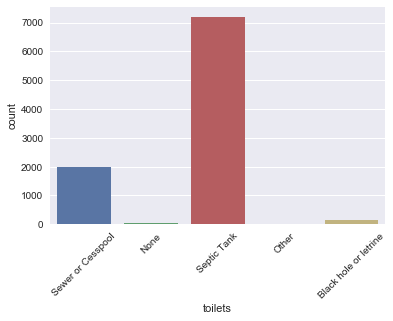

In [61]:
print(train['toilets'].value_counts())
sns.countplot('toilets', data=train)
plt.xticks(rotation=45)

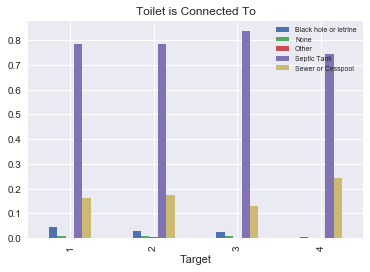

In [62]:
prop_chart('toilets','Toilet is Connected To')

Similar distribution among poverty levels. Majority of toilets connected to septic tanks.

### Inferential Statistics - Difference in Proportions
Is there a significant difference in proportions among the poverty levels for the what toilets are connected to? We will perform a two sample proportions Z tests to test significance.

**Null hypothesis**: There is no significant difference between the proportions.

Alpha = 0.05

In [63]:
for x in train['toilets'].unique():
    print(x)
    propztest_poverty(train, 'toilets', x)
    print()

Sewer or Cesspool
Nonvuln proportion: 0.24505588993981084
Vuln proportion: 0.12985938792390406
Non Vulnerable and Vulnerable: [zscore, P-Value] ['8.724429646990', '0.000000000000']
Significant
Vuln proportion: 0.12985938792390406
Moderate proportion: 0.17407639323731997
Vulnerable and Moderate: [zscore, P-Value] ['-3.204707244646', '0.001351999186']
Significant
Moderate proportion 0.17407639323731997
Extreme proportion 0.16026490066225166
Moderate and Extreme: [zscore, P-Value] ['0.833196884544', '0.404733699369']
Not significant

None
Nonvuln proportion: 0.0015477214101461737
Vuln proportion: 0.007444168734491315
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-3.689770595076', '0.000224456367']
Significant
Vuln proportion: 0.007444168734491315
Moderate proportion: 0.007514088916718848
Vulnerable and Moderate: [zscore, P-Value] ['-0.021280888008', '0.983021589548']
Not significant
Moderate proportion 0.007514088916718848
Extreme proportion 0.009271523178807948
Moderate and Extreme:

8/15 instances of significance. There is enough evidence to deduce significance among the proportions among the poverty levels for what the toilets are connected to. This variable is a good indicator of poverty level.

### Housing Situation

The housing situation of the household.

Own                      5911
Rented                   1695
Own/Paying Instllmnts     821
Other                     786
Precarious                163
Name: housesitu, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

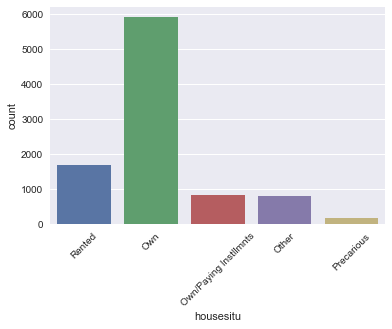

In [64]:
print(train['housesitu'].value_counts())
sns.countplot('housesitu', data=train)
plt.xticks(rotation=45)

Most houses are owned, second most are rented. Unknown what 'other' is meant to be.

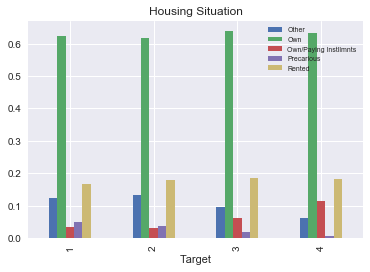

In [65]:
prop_chart('housesitu', 'Housing Situation')

### Inferential Statistics - Difference in Proportions
Is there a significant difference in proportions among the poverty levels for the what toilets are connected to? We will perform a two sample proportions Z tests to test significance.

**Null hypothesis**: There is no significant difference between the proportions.

Alpha = 0.05

In [66]:
for x in train['housesitu'].unique():
    print(x)
    propztest_poverty(train, 'housesitu', x)
    print()

Rented
Nonvuln proportion: 0.18159931212381772
Vuln proportion: 0.18610421836228289
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-0.369081302642', '0.712067124970']
Not significant
Vuln proportion: 0.18610421836228289
Moderate proportion: 0.1797119599248591
Vulnerable and Moderate: [zscore, P-Value] ['0.434142276935', '0.664185126817']
Not significant
Moderate proportion 0.1797119599248591
Extreme proportion 0.16821192052980133
Moderate and Extreme: [zscore, P-Value] ['0.683702021160', '0.494163346938']
Not significant

Own
Nonvuln proportion: 0.6330180567497851
Vuln proportion: 0.6385442514474773
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-0.362935171734', '0.716653312302']
Not significant
Vuln proportion: 0.6385442514474773
Moderate proportion: 0.6180338134001252
Vulnerable and Moderate: [zscore, P-Value] ['1.112443895262', '0.265947340284']
Not significant
Moderate proportion 0.6180338134001252
Extreme proportion 0.623841059602649
Moderate and Extreme: [zscore, P-Value

6/15 instances of significances. There is enough evidence to deduce significance. 

### Energy Source
Main source of energy used for cooking.

Electricity      4527
Gas              4352
Wood Charcoal     479
None               18
Name: energy, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

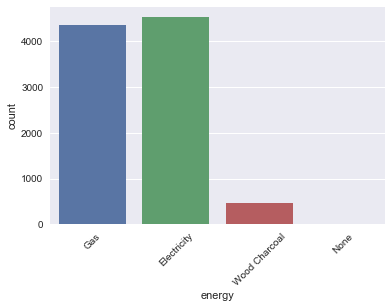

In [67]:
print(train['energy'].value_counts())
sns.countplot('energy', data=train)
plt.xticks(rotation=45)

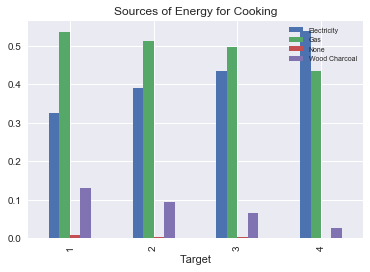

In [68]:
prop_chart('energy', 'Sources of Energy for Cooking')

### Inferential Statistics - Difference in Proportions
Is there a significant difference in proportions among the poverty levels for the sources of energy used for cooking? We will perform a two sample proportions Z tests to test significance.

**Null hypothesis**: There is no significant difference between the proportions.

Alpha = 0.05

In [69]:
for x in train['energy'].unique():
    print(x)
    propztest_poverty(train, 'energy', x)
    print()

Gas
Nonvuln proportion: 0.434737747205503
Vuln proportion: 0.49627791563275436
Non Vulnerable and Vulnerable: [zscore, P-Value] ['-3.917383553110', '0.000089515262']
Significant
Vuln proportion: 0.49627791563275436
Moderate proportion: 0.5134627426424546
Vulnerable and Moderate: [zscore, P-Value] ['-0.901630966655', '0.367252935447']
Not significant
Moderate proportion 0.5134627426424546
Extreme proportion 0.5350993377483444
Moderate and Extreme: [zscore, P-Value] ['-0.980591787947', '0.326794085600']
Not significant

Electricity
Nonvuln proportion: 0.5386070507308685
Vuln proportion: 0.43507030603804797
Non Vulnerable and Vulnerable: [zscore, P-Value] ['6.556859250351', '0.000000000055']
Significant
Vuln proportion: 0.43507030603804797
Moderate proportion: 0.39010644959298685
Vulnerable and Moderate: [zscore, P-Value] ['2.398566290891', '0.016459396916']
Significant
Moderate proportion 0.39010644959298685
Extreme proportion 0.3258278145695364
Moderate and Extreme: [zscore, P-Value] ['

8/12 instances of significance. There is enough evidence to deduce significance. `energy` is a strong indicator of poverty level.

### Appliances

`v18q` owns a tablet

`v18q1` number of tablets household owns

`computer` =1 if the household has notebook or desktop computer

`television` =1 if the household has TV

`mobilephone` =1 if mobile phone

`qmobilephone` # of mobile phones


In [70]:
appliances = train[['v18q', 'v18q1', 'computer', 'television', 'mobilephone', 'qmobilephone']]
appliances.sample(10)

,v18q,v18q1,computer,television,mobilephone,qmobilephone
2693,1,1.0,0,0,1,3
6272,0,0.0,0,0,1,2
6084,0,0.0,0,1,1,3
3258,1,3.0,1,1,1,3
1233,0,0.0,0,1,1,8
7054,0,0.0,0,0,1,3
413,1,1.0,0,0,1,3
6829,1,2.0,0,0,1,2
4912,0,0.0,1,0,1,4
1142,1,1.0,1,1,1,5


A household can own two or more different appliances at the same time. 

In [71]:
appliances.describe()

,v18q,v18q1,computer,television,mobilephone,qmobilephone
count,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000
mean,0.225363,0.312500,0.096950,0.283596,0.974829,2.815166
std,0.417843,0.679323,0.295905,0.450767,0.156652,1.481501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000


0    7263
1    2113
Name: v18q, dtype: int64


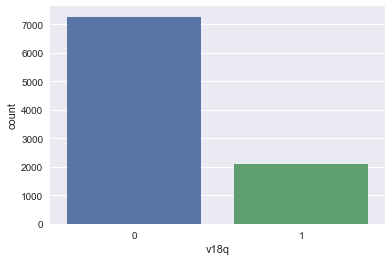

0.0    7263
1.0    1530
2.0     423
3.0     111
4.0      30
5.0      13
6.0       6
Name: v18q1, dtype: int64


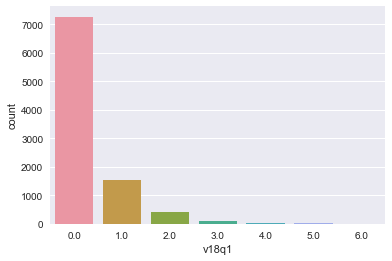

0    8467
1     909
Name: computer, dtype: int64


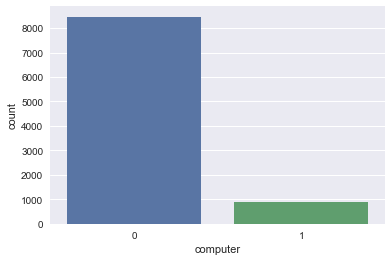

0    6717
1    2659
Name: television, dtype: int64


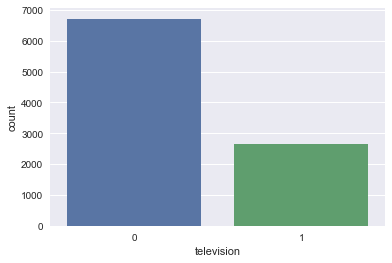

1    9140
0     236
Name: mobilephone, dtype: int64


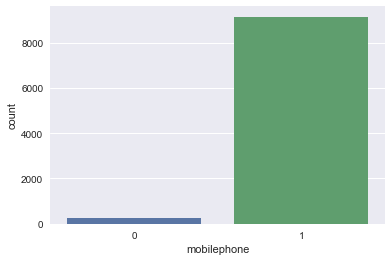

2     3091
3     2168
4     1545
1     1226
5      653
6      310
0      236
8       62
7       50
9       18
10      17
Name: qmobilephone, dtype: int64


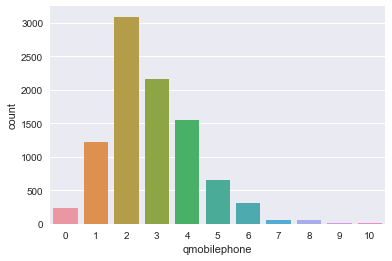

In [72]:
for x in appliances.columns:
    print(appliances[x].value_counts())
    sns.countplot(x, data=train)
    plt.show()

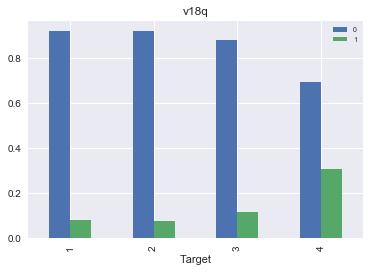

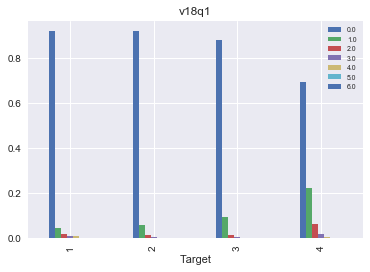

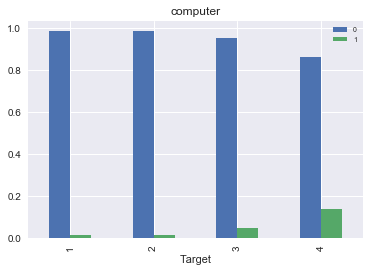

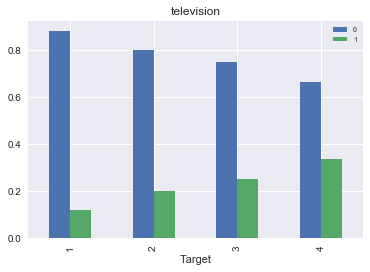

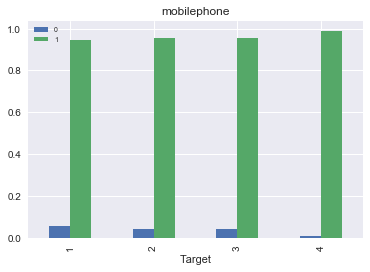

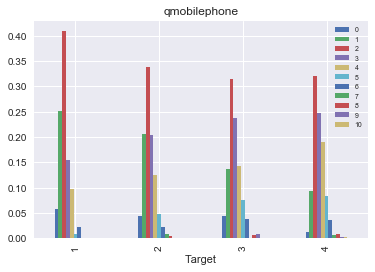

In [73]:
for x in appliances.columns:
    prop_chart(x, x)

### Inferential Statistics - Difference in Proportions
Is there a significant difference in proportions among the poverty levels for appliances? We will perform a two sample proportions Z tests to test significance.

**Null hypothesis**: There is no significant difference between the proportions.

Alpha = 0.05

In [74]:
print('Tablets')
propztest_poverty(train, 'v18q', 1)
print()

print('Computer')
propztest_poverty(train, 'computer', 1)
print()

print('Television')
propztest_poverty(train, 'television', 1)
print()

print('Mobile Phones')
propztest_poverty(train, 'mobilephone', 1)
print()

Tablets
Nonvuln proportion: 0.3069647463456578
Vuln proportion: 0.11827956989247312
Non Vulnerable and Vulnerable: [zscore, P-Value] ['13.376725628054', '0.000000000000']
Significant
Vuln proportion: 0.11827956989247312
Moderate proportion: 0.07827175954915466
Vulnerable and Moderate: [zscore, P-Value] ['3.570598504316', '0.000356166479']
Significant
Moderate proportion 0.07827175954915466
Extreme proportion 0.07947019867549669
Moderate and Extreme: [zscore, P-Value] ['-0.100796453552', '0.919712042160']
Not significant

Computer
Nonvuln proportion: 0.1399828030954428
Vuln proportion: 0.04714640198511166
Non Vulnerable and Vulnerable: [zscore, P-Value] ['8.911401737048', '0.000000000000']
Significant
Vuln proportion: 0.04714640198511166
Moderate proportion: 0.015654351909830933
Vulnerable and Moderate: [zscore, P-Value] ['4.904558255463', '0.000000936378']
Significant
Moderate proportion 0.015654351909830933
Extreme proportion 0.017218543046357615
Moderate and Extreme: [zscore, P-Value

* Whether a household owns a tablet or not seems like a significant indicator of poverty level.
* Whether a household owns a computer or not seems like a significant indicator of poverty level.
* Whether a household owns a television or not seems like a significant indicator of poverty level.
* Whether a household owns a mobile phone or not does not seem like a significant indicator of poverty. A large majority of households own a mobile phone. 


### *Differences in means* 

We will compare the differences in means for # of tablets and # of mobile phones, for those that own these two appliances. We will use a two sample z test to compare the means.

**Null Hypothesis**: There is no significant differences among the means of the poverty levels. 

Alpha = 0.05

In [75]:
# Number of Tablets
def ztestmean_poverty(data, column):
    print(column)
    
    nonvuln = train[train['Target']==4][column]
    vuln = train[train['Target']==3][column]
    moder = train[train['Target']==2][column]
    extreme = train[train['Target']==1][column]
    total = train[column]

    print('Nonvulnerable mean: ', np.mean(nonvuln))
    print('Vulnerable mean: ', np.mean(vuln))
    print('Moderate mean: ', np.mean(moder))
    print('Extreme mean: ', np.mean(extreme))
    print('Total Mean: ', np.mean(total))
    print()
    
    tstat, p= ztest(trainrented[trainrented['Target'] == 4][column],
                           trainrented[trainrented['Target'] == 3][column])
    print('Nonvulnerable and Vulnerable p-val: ', p)
    if p < 0.05: 
        print('Significant')
    else: 
        print('Non Significant')
        
    tstat, p= ztest(trainrented[trainrented['Target'] == 3][column],
                           trainrented[trainrented['Target'] == 2][column])
    print('Vulnerable and Moderate p-val: ', p)
    if p < 0.05: 
        print('Significant')
    else: 
        print('Non Significant')
    
    tstat, p= ztest(trainrented[trainrented['Target'] == 2][column],
                           trainrented[trainrented['Target'] == 1][column])
    print('Moderate and Extreme p-val: ', p)
    if p < 0.05: 
        print('Significant')
    else: 
        print('Non Significant')
        
    print()
        
print('Number of tablets')
ztestmean_poverty(train, 'v18q1')

Number of tablets
v18q1
Nonvulnerable mean:  0.42717110920034396
Vulnerable mean:  0.1513647642679901
Moderate mean:  0.09956167814652474
Extreme mean:  0.13774834437086092
Total Mean:  0.3125

Nonvulnerable and Vulnerable p-val:  2.442961064018827e-05
Significant
Vulnerable and Moderate p-val:  0.15448906803606116
Non Significant
Moderate and Extreme p-val:  0.3442365904497462
Non Significant



In [76]:
# Number of Phones
print('Number of phones')
ztestmean_poverty(train, 'qmobilephone')

Number of phones
qmobilephone
Nonvulnerable mean:  3.016165090283749
Vulnerable mean:  2.761786600496278
Moderate mean:  2.4633688165309957
Extreme mean:  2.0966887417218545
Total Mean:  2.81516638225256

Nonvulnerable and Vulnerable p-val:  0.5231709110965508
Non Significant
Vulnerable and Moderate p-val:  4.45210844365959e-06
Significant
Moderate and Extreme p-val:  0.24009814273092178
Non Significant



Neither of these variables seem to be a significant indicator of poverty. 

### Remaining Numerical Variables

rooms,  number of all rooms in the house

r4h1, Males younger than 12 years of age

r4h2, Males 12 years of age and older

r4h3, Total males in the household

r4m1, Females younger than 12 years of age

r4m2, Females 12 years of age and older

r4m3, Total females in the household

r4t1, persons younger than 12 years of age

r4t2, persons 12 years of age and older

r4t3, Total persons in the household

tamhog, size of the household

tamviv, number of persons living in the household

hhsize, household size

hogar_nin, Number of children 0 to 19 in household

hogar_adul, Number of adults in household

hogar_mayor, # of individuals 65+ in the household

hogar_total, # of total individuals in the household

dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 
64)/(number of member of household between 19 and 64)

meaneduc, average years of education for adults (18+)

bedrooms, number of bedrooms

overcrowding, # persons per room

age, Age in years

SQBescolari, escolari squared

SQBage, age squared

SQBhogar_total, hogar_total squared

SQBedjefe, edjefe squared

SQBhogar_nin, hogar_nin squared

SQBovercrowding, overcrowding squared

SQBdependency, dependency squared

SQBmeaned, square of the mean years of education of adults (>=18) in the household

agesq, Age squared


In [77]:
numeric = {'rooms':['rooms'],
           'males': ['r4h1', 'r4h2', 'r4h3'],
          'females': ['r4m1', 'r4m2', 'r4m3'],
          'persons': ['r4t1', 'r4t2', 'r4t3'],
          'sizeohhold':['tamhog'],
          '#ofpersons':['tamviv'],
          'hholdsize':['hhsize'],
          '#ofchild':['hogar_nin'],
          '#ofadults':['hogar_adul'],
          '#ofseniors':['hogar_mayor'],
          '#oftotal':['hogar_total'],
          'dependencyrate':['dependency'],
          'avgyrsofeduc':['meaneduc'],
          '#ofbedrooms':['bedrooms'],
          '#persons/room':['overcrowding'],
          'age':['age'],
          'SQBvars':['SQBescolari','SQBage','SQBhogar_total','SQBedjefe',
                     'SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']}

### Rooms
Number of rooms and bedrooms

Text(0.5,1,'Rooms per Household')

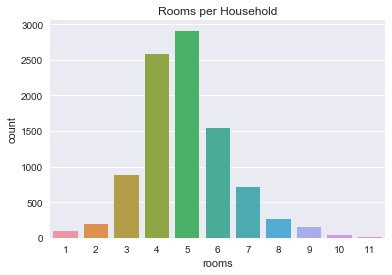

In [78]:
sns.countplot('rooms', data=train)
plt.title('Rooms per Household')

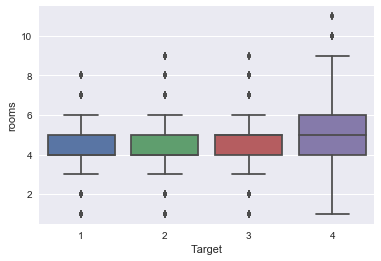

In [79]:
sns.boxplot(x='Target', y='rooms', data=train)

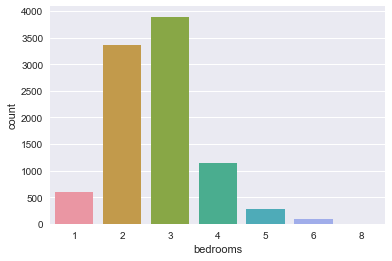

In [80]:
sns.countplot(train['bedrooms'], data=train)

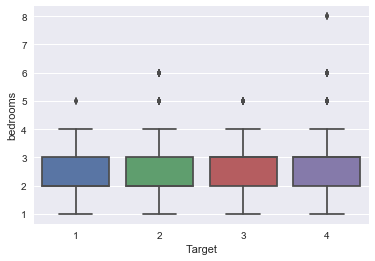

In [81]:
sns.boxplot(x='Target', y='bedrooms', data=train)

In [82]:
#rooms
for i in train['Target'].unique():
    print(i)
    print(trainrented[(trainrented['Target'] == i)]['rooms'].describe())
    print()

4
count    1056.000000
mean        4.390152
std         1.228901
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: rooms, dtype: float64

2
count    287.000000
mean       4.226481
std        1.116123
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: rooms, dtype: float64

3
count    225.000000
mean       4.391111
std        1.256381
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: rooms, dtype: float64

1
count    127.000000
mean       4.385827
std        1.076792
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: rooms, dtype: float64



In [83]:
#bedrooms
for i in train['Target'].unique():
    print(i)
    print(trainrented[(trainrented['Target'] == i)]['bedrooms'].describe())
    print()

4
count    1056.000000
mean        2.395833
std         0.779197
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: bedrooms, dtype: float64

2
count    287.000000
mean       2.299652
std        0.715048
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: bedrooms, dtype: float64

3
count    225.000000
mean       2.368889
std        0.887367
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: bedrooms, dtype: float64

1
count    127.000000
mean       2.346457
std        0.671151
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: bedrooms, dtype: float64



### *Inferential Statistics - Differences in means*
We'll do some two sample z tests to test the significances of the difference in means among the poverty levels.


In [84]:
ztestmean_poverty(train, 'rooms')

rooms
Nonvulnerable mean:  5.167153912295786
Vulnerable mean:  4.729528535980148
Moderate mean:  4.483406386975579
Extreme mean:  4.3271523178807945
Total Mean:  4.926621160409557

Nonvulnerable and Vulnerable p-val:  0.9915483954505816
Non Significant
Vulnerable and Moderate p-val:  0.11708401699179055
Non Significant
Moderate and Extreme p-val:  0.17573605369033574
Non Significant



Looks like there is no evidence of significance. `rooms` is not a good indicator of poverty. What about bedrooms?

In [85]:
ztestmean_poverty(train, 'bedrooms')

bedrooms
Nonvulnerable mean:  2.8416165090283747
Vulnerable mean:  2.686517783291977
Moderate mean:  2.5297432686286787
Extreme mean:  2.3933774834437087
Total Mean:  2.732401877133106

Nonvulnerable and Vulnerable p-val:  0.6461205527623743
Non Significant
Vulnerable and Moderate p-val:  0.3282488171825002
Non Significant
Moderate and Extreme p-val:  0.5315253472667907
Non Significant



Neither `rooms` nor `bedrooms` can be considered as significant indicators of poverty level. Can we remove one these variables to prevent multicollinearity?

### Males and Females

`r4h1` Males younger than 12 years of age

`r4h2` Males 12 years of age and older

`r4h3` Total males in the household

`r4m1` Females younger than 12 years of age

`r4m2` Females 12 years of age and older

`r4m3` Total females in the household

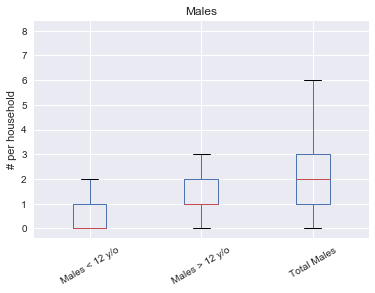

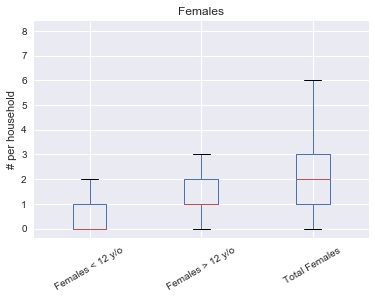

In [86]:
males=['r4h1', 'r4h2', 'r4h3']
train.boxplot(males)
plt.title('Males')
plt.xticks([1,2,3], ['Males < 12 y/o', 'Males > 12 y/o', 'Total Males'], rotation=30)
plt.ylabel('# per household')
plt.show()

females=['r4m1', 'r4m2', 'r4m3']
train.boxplot(females)
plt.title('Females')
plt.xticks([1,2,3], ['Females < 12 y/o', 'Females > 12 y/o', 'Total Females'], rotation=30)
plt.ylabel('# per household')
plt.show()

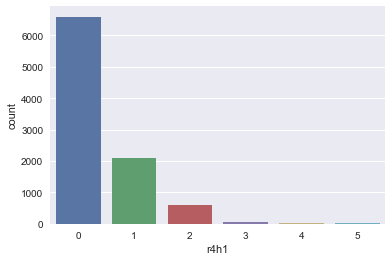

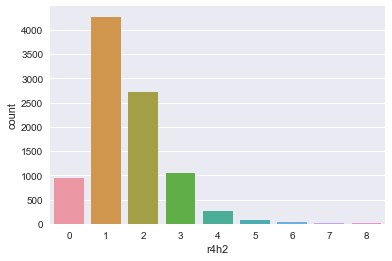

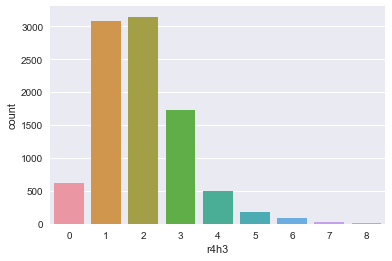

In [87]:
for x in males: 
    sns.countplot(x, data=train)
    plt.show()

Pretty much the same distribution between male and females per household.

Males


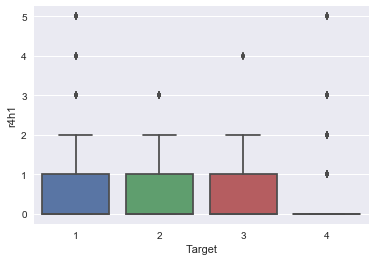

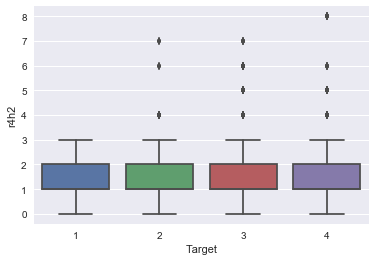

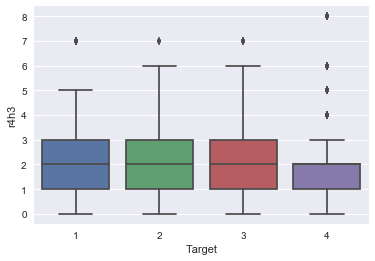

Females


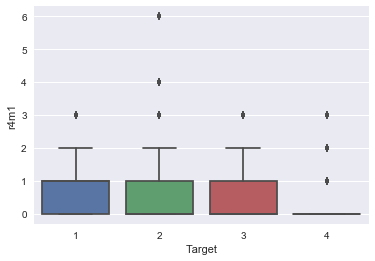

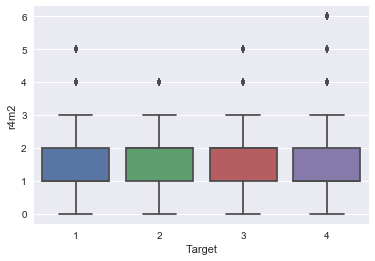

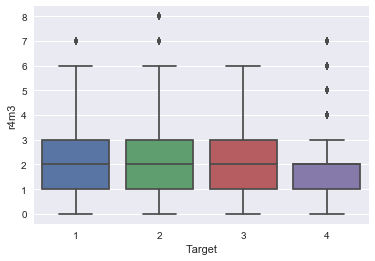

In [88]:
print('Males')
for x in males:
    sns.boxplot('Target', x, data=train)
    plt.show()
    
print('Females')
for x in females:
    sns.boxplot('Target', x, data=train)
    plt.show()

Little to no differences among the poverty levels for each distribution for males and females. 

### *Inferential Statistics - Difference in Means*

In [89]:
print('Males')
for x in males:
    ztestmean_poverty(train, x)

Males
r4h1
Nonvulnerable mean:  0.2794496990541703
Vulnerable mean:  0.4052936311000827
Moderate mean:  0.5604257983719474
Extreme mean:  0.7960264900662252
Total Mean:  0.38513225255972694

Nonvulnerable and Vulnerable p-val:  2.0892074937999043e-11
Significant
Vulnerable and Moderate p-val:  0.06700498624425513
Non Significant
Moderate and Extreme p-val:  6.555039026737127e-13
Significant

r4h2
Nonvulnerable mean:  1.613585554600172
Vulnerable mean:  1.6923076923076923
Moderate mean:  1.4746399499060738
Extreme mean:  1.1602649006622516
Total Mean:  1.5635665529010239

Nonvulnerable and Vulnerable p-val:  0.0012504659278173614
Significant
Vulnerable and Moderate p-val:  3.224897961430969e-14
Significant
Moderate and Extreme p-val:  0.001060202541899252
Significant

r4h3
Nonvulnerable mean:  1.8930352536543422
Vulnerable mean:  2.097601323407775
Moderate mean:  2.0350657482780212
Extreme mean:  1.956291390728477
Total Mean:  1.9486988054607508

Nonvulnerable and Vulnerable p-val:  1.2

Although we get significant results for each test here, the means are very close to each other. We should investigate further. 

Text(0.5,1,'Mean Males per household by poverty level')

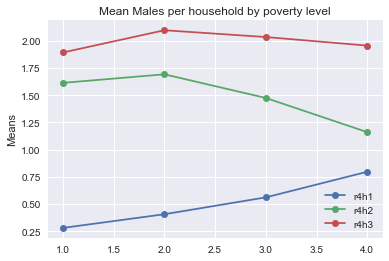

In [90]:
for x in males:
    nonvuln = train[train['Target']==4][x]
    vuln = train[train['Target']==3][x]
    moder = train[train['Target']==2][x]
    extreme = train[train['Target']==1][x]
    
    means = [np.mean(nonvuln), np.mean(vuln), np.mean(moder), np.mean(extreme)]
    
    plt.plot(levels, means, marker='o')

plt.legend(males)
plt.ylabel('Means')
plt.title('Mean Males per household by poverty level')

In [91]:
print('Females')
for x in females:
    ztestmean_poverty(train, x)

Females
r4m1
Nonvulnerable mean:  0.27773000859845226
Vulnerable mean:  0.4425144747725393
Moderate mean:  0.628052598622417
Extreme mean:  0.8
Total Mean:  0.40070392491467577

Nonvulnerable and Vulnerable p-val:  6.685484925404525e-15
Significant
Vulnerable and Moderate p-val:  0.006238873357534952
Significant
Moderate and Extreme p-val:  0.034193246817781506
Significant

r4m2
Nonvulnerable mean:  1.62871883061049
Vulnerable mean:  1.7402812241521919
Moderate mean:  1.707576706324358
Extreme mean:  1.7019867549668874
Total Mean:  1.6624360068259385

Nonvulnerable and Vulnerable p-val:  0.5887739333680901
Non Significant
Vulnerable and Moderate p-val:  0.00026679842460845533
Significant
Moderate and Extreme p-val:  0.0007255908091874115
Significant

r4m3
Nonvulnerable mean:  1.9064488392089425
Vulnerable mean:  2.182795698924731
Moderate mean:  2.3356293049467753
Extreme mean:  2.5019867549668873
Total Mean:  2.0631399317406145

Nonvulnerable and Vulnerable p-val:  5.842713884350407e-

Text(0.5,1,'Mean Males per household by poverty level')

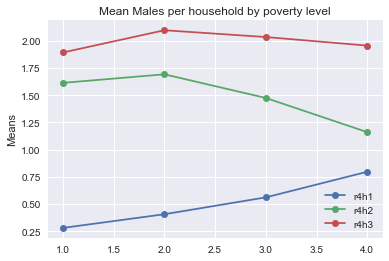

In [92]:
for x in males:
    nonvuln = train[train['Target']==4][x]
    vuln = train[train['Target']==3][x]
    moder = train[train['Target']==2][x]
    extreme = train[train['Target']==1][x]
    
    means = [np.mean(nonvuln), np.mean(vuln), np.mean(moder), np.mean(extreme)]
    
    plt.plot(levels, means, marker='o')

plt.legend(males)
plt.ylabel('Means')
plt.title('Mean Males per household by poverty level')

### Children and Adults

`hogar_nin` Number of children 0 to 19 in household

`hogar_adul` Number of adults in household

`hogar_mayor` # of individuals 65+ in the household

`hogar_total` # of total individuals in the household

Text(0,0.5,'# per household')

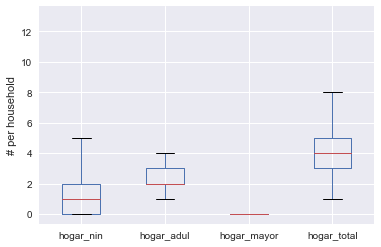

In [93]:
hogar = ['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']
train.boxplot(hogar)
plt.ylabel('# per household')


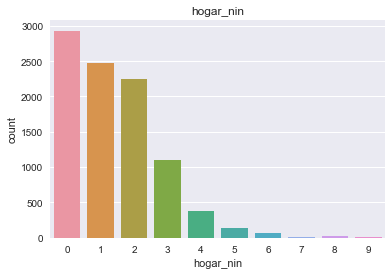

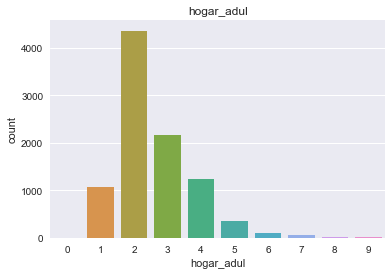

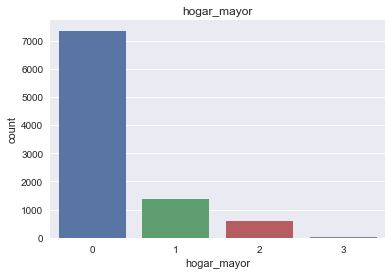

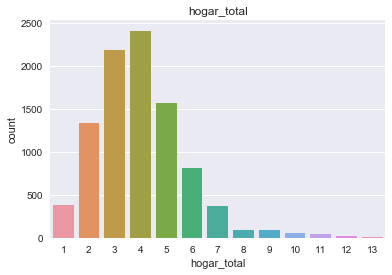

In [94]:
for x in hogar:
    sns.countplot(x, data=train)
    plt.title(x)
    plt.show()

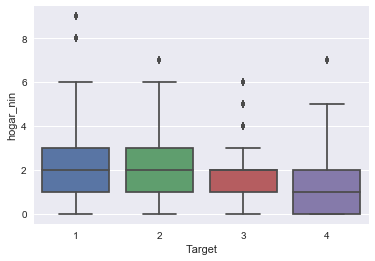

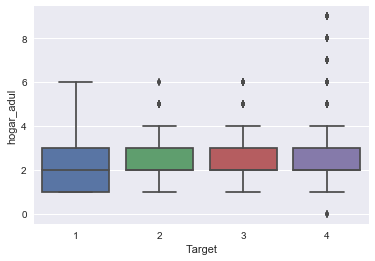

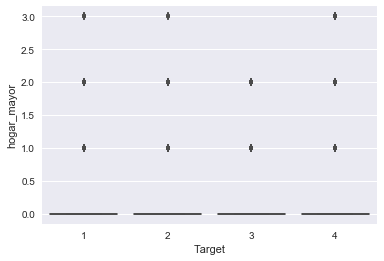

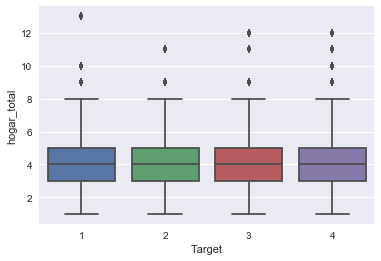

In [95]:
for x in hogar:
    sns.boxplot('Target', x, data=train)
    plt.show()

### *Inferential Statistics - Difference in means*

Is there a signficant difference in the means among the poverty levels for these levels? We will perform two sample z testing to find out. 

In [96]:
ztestmean_poverty(train, 'hogar_nin')
ztestmean_poverty(train, 'hogar_adul')
ztestmean_poverty(train, 'hogar_mayor')
ztestmean_poverty(train, 'hogar_total')

hogar_nin
Nonvulnerable mean:  1.0715391229578677
Vulnerable mean:  1.6724565756823822
Moderate mean:  2.0206637445209767
Extreme mean:  2.3086092715231787
Total Mean:  1.4103029010238908

Nonvulnerable and Vulnerable p-val:  4.10974132593153e-27
Significant
Vulnerable and Moderate p-val:  0.02231873432216035
Significant
Moderate and Extreme p-val:  2.822268102579227e-08
Significant

hogar_adul
Nonvulnerable mean:  2.7224419604471195
Vulnerable mean:  2.600496277915633
Moderate mean:  2.3412648716343143
Extreme mean:  2.147019867549669
Total Mean:  2.5954564846416384

Nonvulnerable and Vulnerable p-val:  0.958394660147728
Non Significant
Vulnerable and Moderate p-val:  1.042101429327799e-09
Significant
Moderate and Extreme p-val:  0.6523665975237356
Non Significant

hogar_mayor
Nonvulnerable mean:  0.28650042992261393
Vulnerable mean:  0.28287841191067
Moderate mean:  0.3224796493425172
Extreme mean:  0.24370860927152319
Total Mean:  0.2887158703071672

Nonvulnerable and Vulnerable p-v

`hogar_adul` and `hogar_mayor` both do not have enough evidence of significance, while `hogar_nin` and `hogar_total` do. 

## Mean Education
`meaneduc` average years of education for adults (18+)

Text(0,0.5,'Count')

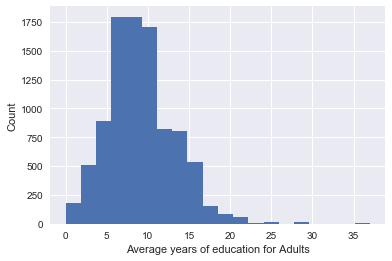

In [97]:
plt.hist(train['meaneduc'], bins=20)
plt.xlabel('Average years of education for Adults')
plt.ylabel('Count')

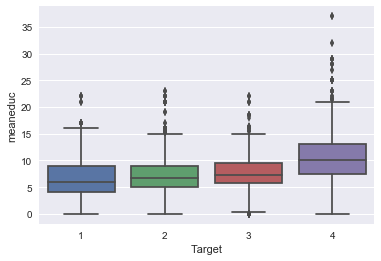

In [98]:
sns.boxplot('Target', 'meaneduc', data=train)

### Inferential Statistics - Difference in means

Is there significant differences among the means of each poverty level for average years of education? We will perform two sample z tests to see. 

In [99]:
ztestmean_poverty(train, 'meaneduc')

meaneduc
Nonvulnerable mean:  10.214638653098891
Vulnerable mean:  7.615494897452442
Moderate mean:  7.3003965717407535
Extreme mean:  6.869205288556284
Total Mean:  9.113720180964178

Nonvulnerable and Vulnerable p-val:  1.6332919880514034e-10
Significant
Vulnerable and Moderate p-val:  0.7250079608565215
Non Significant
Moderate and Extreme p-val:  0.015017049401229865
Significant



Seems to be enough evidence for significance. `meaneduc` is a significant indicator of poverty level. 

## Squared Variables

These variables are the squared values of some of the other existing variables.

`SQBescolari` escolari squared

`SQBage` age squared

`SQBhogar_total` hogar_total squared

`SQBedjefe` edjefe squared

`SQBhogar_nin` hogar_nin squared

`SQBovercrowding` overcrowding squared

`SQBdependency` dependency squared

`SQBmeaned` square of the mean years of education of adults (>=18) in the household

`agesq` Age squared

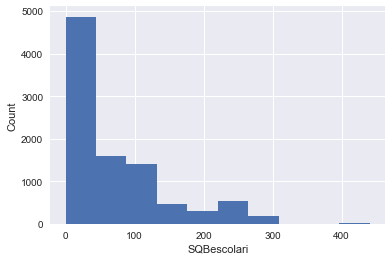

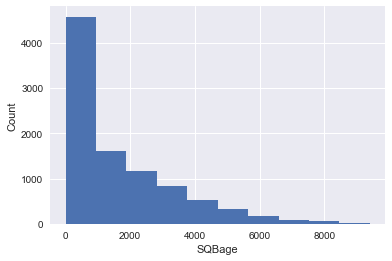

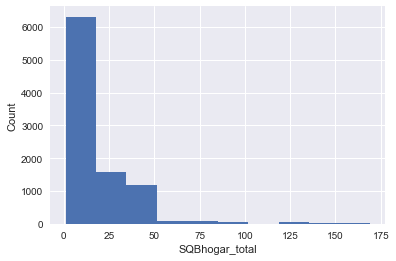

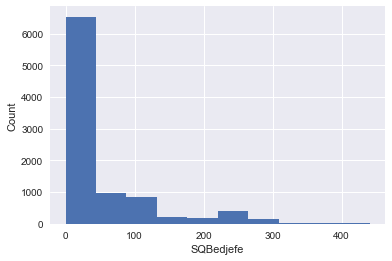

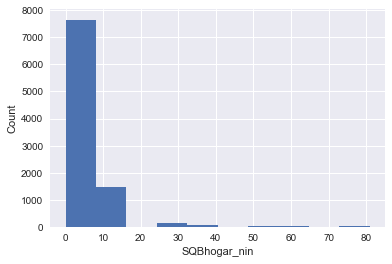

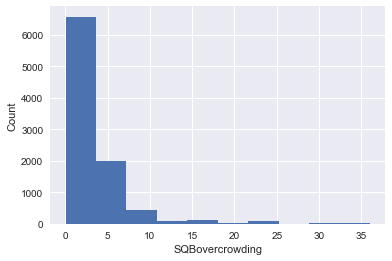

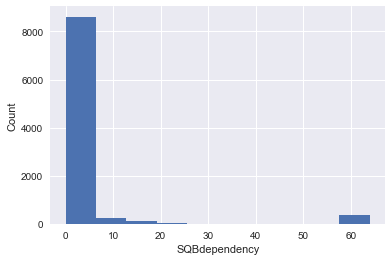

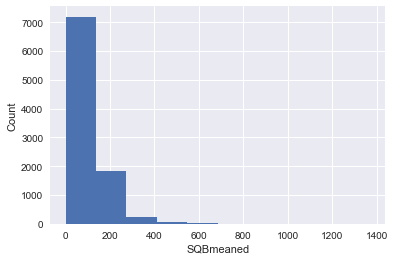

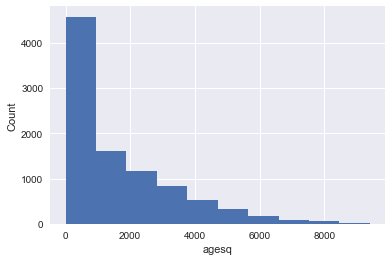

In [100]:
squared = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin','SQBovercrowding','SQBdependency',
          'SQBmeaned','agesq']

for x in squared:
    plt.hist(train[x])
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

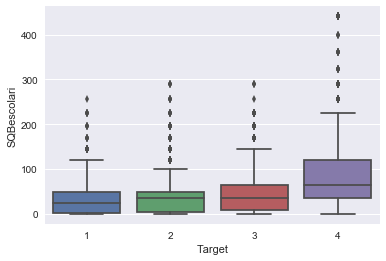

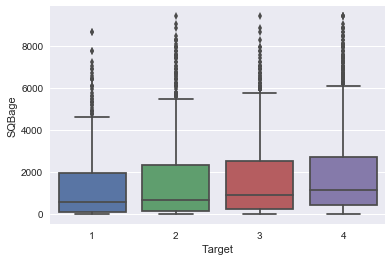

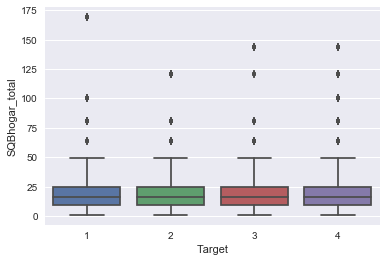

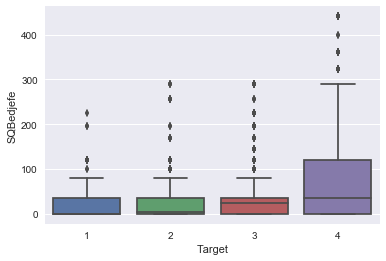

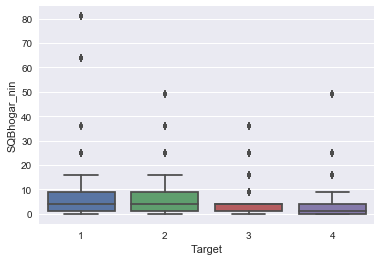

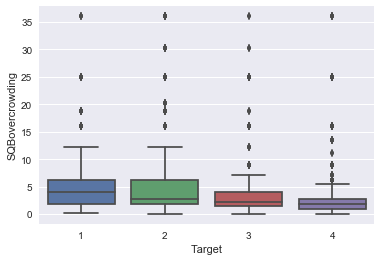

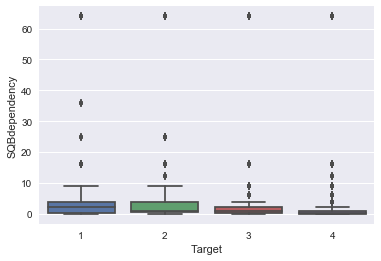

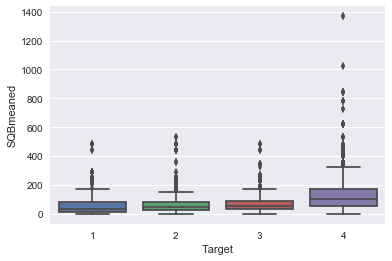

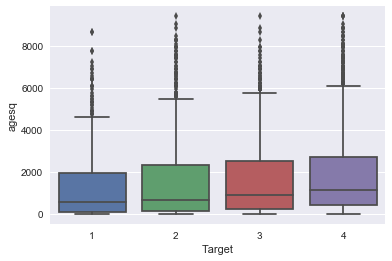

In [101]:
for x in squared:
    sns.boxplot('Target', x, data=train)
    plt.show()

In [102]:
#remove outliers
df1 = train.copy()
df1 = train[train['SQBescolari'] < 250]
df1 = train[train['SQBage'] < 6000]
df1 = train[train['SQBhogar_total'] < 75]
df1 = train[train['SQBedjefe'] < 300]
df1 = train[train['SQBhogar_nin'] < 30]
df1 = train[train['SQBovercrowding'] < 15]
df1 = train[train['SQBdependency'] < 17]
df1 = train[train['SQBmeaned'] < 400]
df1 = train[train['agesq'] < 6500]

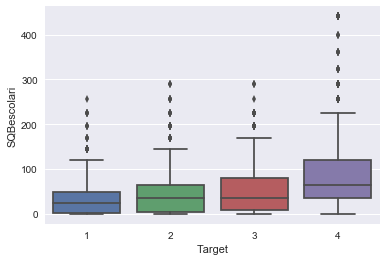

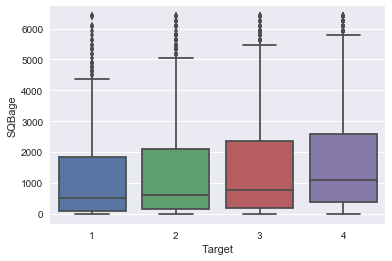

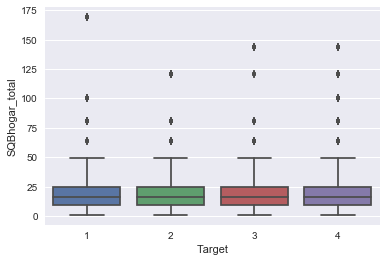

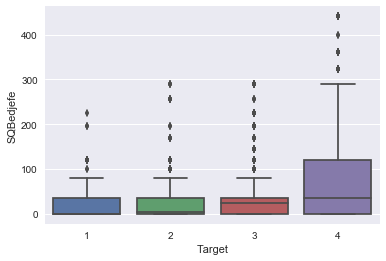

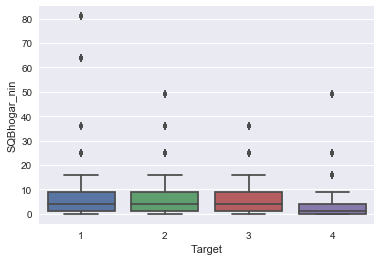

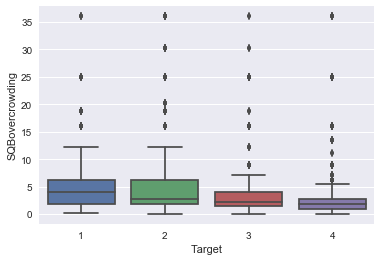

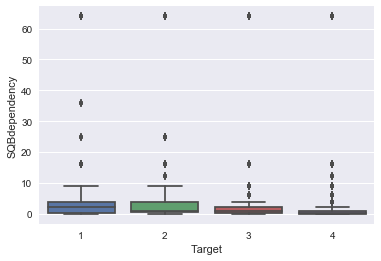

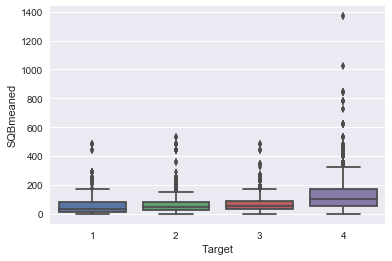

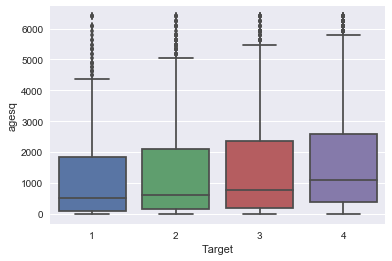

In [103]:
for x in squared:
    sns.boxplot('Target', x, data=df1)
    plt.show()

### *Inferential Statistics - Difference in means*
Is there a significant difference among the poverty levels for each of the Squared variables? We will perform two sample z tests to determine this.

In [104]:
for x in squared:
    ztestmean_poverty(train, x)

SQBescolari
Nonvulnerable mean:  90.53379191745486
Vulnerable mean:  48.546732837055416
Moderate mean:  41.20162805259862
Extreme mean:  37.505960264900665
Total Mean:  72.4469923208191

Nonvulnerable and Vulnerable p-val:  1.2348462376330741e-11
Significant
Vulnerable and Moderate p-val:  0.18735989593704283
Non Significant
Moderate and Extreme p-val:  0.14810351819003847
Non Significant

SQBage
Nonvulnerable mean:  1741.4029234737748
Vulnerable mean:  1616.3829611248966
Moderate mean:  1506.6775203506575
Extreme mean:  1293.2807947019867
Total Mean:  1649.216723549488

Nonvulnerable and Vulnerable p-val:  0.008264261391152175
Significant
Vulnerable and Moderate p-val:  0.9261610559006312
Non Significant
Moderate and Extreme p-val:  0.0858911173188405
Non Significant

SQBhogar_total
Nonvulnerable mean:  17.112295786758384
Vulnerable mean:  21.687344913151364
Moderate mean:  22.254226675015655
Extreme mean:  24.86092715231788
Total Mean:  19.202005119453926

Nonvulnerable and Vulnerabl

### Household size and # of persons

`tamhog` size of the household

`tamviv` number of persons living in the household

`hhsize` household size

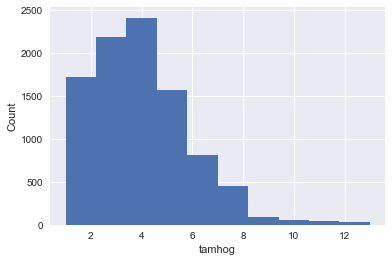

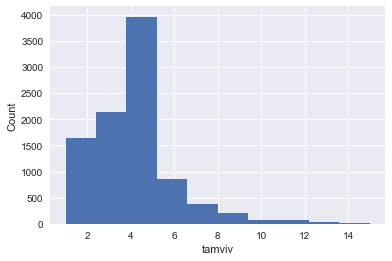

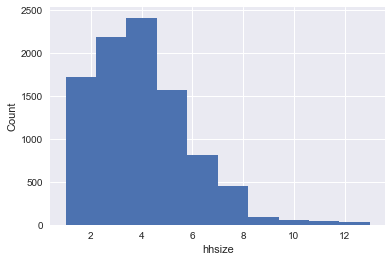

In [105]:
hsize = ['tamhog', 'tamviv', 'hhsize']

for x in hsize:
    plt.hist(train[x])
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

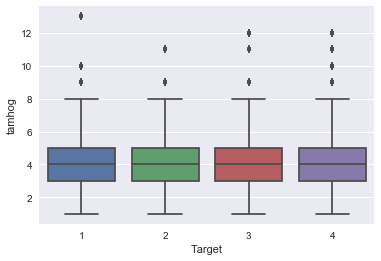

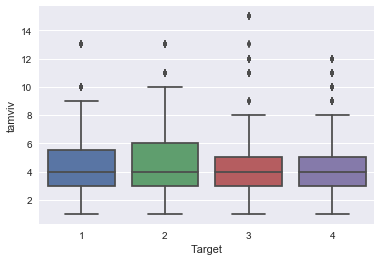

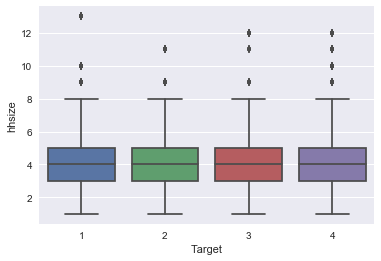

In [106]:
for x in hsize:
    sns.boxplot('Target', x, data=train)
    plt.show()

### *Inferential Statistics - Differences in means*
Are there significant differences among the means for these variables pertaining to household size among each poverty level?

In [107]:
for x in hsize:
    ztestmean_poverty(train, x)

tamhog
Nonvulnerable mean:  3.793981083404987
Vulnerable mean:  4.272952853598015
Moderate mean:  4.361928616155291
Extreme mean:  4.4556291390728475
Total Mean:  4.005759385665529

Nonvulnerable and Vulnerable p-val:  2.920020565499584e-13
Significant
Vulnerable and Moderate p-val:  0.2662044412713247
Non Significant
Moderate and Extreme p-val:  3.6827461693775517e-07
Significant

tamviv
Nonvulnerable mean:  3.85743766122098
Vulnerable mean:  4.421836228287841
Moderate mean:  4.529743268628679
Extreme mean:  4.570860927152318
Total Mean:  4.102175767918089

Nonvulnerable and Vulnerable p-val:  4.545833189932063e-17
Significant
Vulnerable and Moderate p-val:  0.42128263741085115
Non Significant
Moderate and Extreme p-val:  0.00020537959591876857
Significant

hhsize
Nonvulnerable mean:  3.793981083404987
Vulnerable mean:  4.272952853598015
Moderate mean:  4.361928616155291
Extreme mean:  4.4556291390728475
Total Mean:  4.005759385665529

Nonvulnerable and Vulnerable p-val:  2.9200205654

Text(0.5,1,'Mean Household Sizes by poverty level')

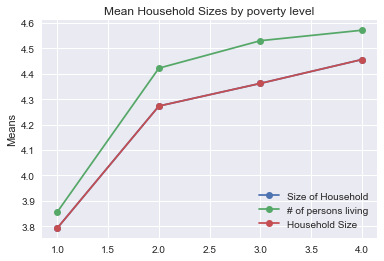

In [108]:
for x in hsize:
    nonvuln = train[train['Target']==4][x]
    vuln = train[train['Target']==3][x]
    moder = train[train['Target']==2][x]
    extreme = train[train['Target']==1][x]
    
    means = [np.mean(nonvuln), np.mean(vuln), np.mean(moder), np.mean(extreme)]
    
    plt.plot(levels, means, marker='o')

plt.legend(['Size of Household', '# of persons living', 'Household Size'])
plt.ylabel('Means')
plt.title('Mean Household Sizes by poverty level')

Seems like `tamhog` and `hhsize` have the exact same distribution so we can remove one of them. Each of these variables seem to have significant differences among the means for each poverty level. 

## Feature Engineering

We are going to remove features that are poor indicators of poverty level and have high correlation with other features. 


In [109]:
corr = train.corr()
corr.style.background_gradient()

In [110]:
print(corr.columns)

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3',
       'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'cielorazo', 'dis',
       'male', 'female', 'hogar_nin', 'hogar_adul', 'hogar_mayor',
       'hogar_total', 'meaneduc', 'bedrooms', 'overcrowding', 'computer',
       'television', 'mobilephone', 'qmobilephone', 'area1', 'area2', 'age',
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object')


In [111]:
# print out all variables with correlation > 0.7
rows, cols = corr.shape
flds = list(corr.columns)
highcorr = pd.DataFrame(columns=['column1','column2','correlation'])

for i in flds:
    for j in flds:
        if ((corr.loc[i,j] > 0.7) & (corr.loc[i,j] < 1.0)):
            highcorr = highcorr.append({'column1':flds[flds.index(i)],
                                       'column2':flds[flds.index(j)],
                                       'correlation':corr.loc[i,j]}, ignore_index=True)
            #print(flds[flds.index(i)], ' ', flds[flds.index(j)], ' ', corr.loc[i,j])
                                             


In [112]:
pd.set_option('display.max_rows', 100)
highcorr.sort_values(by=['column1','correlation'], axis=0, ascending=False)

,column1,column2,correlation
3,v18q1,v18q,0.852914
2,v18q,v18q1,0.852914
51,tamviv,r4t3,0.944543
52,tamviv,tamhog,0.943229
53,tamviv,hhsize,0.943229
55,tamviv,hogar_total,0.943229
56,tamviv,SQBhogar_total,0.900834
50,tamviv,r4t2,0.745358
54,tamviv,hogar_nin,0.718169
49,tamviv,r4m3,0.700279


**Variables with high correlation:**

* v18q1 x v18q
* tamviv x [r4t3, tamhog, hhsize, hogar_total, SQBhogar_total, r4t2]
* rooms x bedrooms
* r4t1 x [r4m1, hogar_nin, r4h1]
* r4m3 x r4m2
* r4h3 x r4h2
* overcrowding x SQBovercrowding
* meaneduc x SQBmeaned
* hogar_nin x SQBhogar_nin

In [113]:
# print out correlations with Target
highcorrtarget = pd.DataFrame(columns = ['Column', 'Correlation With Target'])
for i in flds:
    highcorrtarget = highcorrtarget.append({'Column':flds[flds.index(i)], 'Correlation With Target':corr.loc[i,'Target']},
                                          ignore_index=True)
highcorrtarget.sort_values(by=['Correlation With Target'], axis=0, ascending=False)

,Column,Correlation With Target
49,Target,1.000000
30,meaneduc,0.326111
19,escolari,0.298782
22,cielorazo,0.298509
40,SQBescolari,0.292260
47,SQBmeaned,0.267016
43,SQBedjefe,0.240522
6,v18q,0.233933
2,rooms,0.217884
36,qmobilephone,0.199807


#### *Deciding which highly correlated variables to keep and which ones to remove.*

* We will keep variables with higher correlation to the target variable. 
* Get rid of Squared values, as there does not seem to be any reason to keep them. 
* Significance testing indicates little to no effect on target variable.
* Use our own judgment as pertains to each variable.

In [114]:
def drop(data):
    columns_to_drop = ['v18q1', 'hacapo', 'bedrooms', 'hacdor', 'r4t3', 'tamhog', 'tamviv', 'hogar_total', 'r4t2', 'r4m1',
                      'hogar_nin', 'r4h1', 'r4m2', 'r4h2', 'SQBovercrowding', 'SQBmeaned', 'SQBhogar_nin', 'SQBescolari',
                      'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBdependency', 'agesq', 'waterprov', 'regions', 
                      'relations', 'mobilephone', 'qmobilephone', 'idhogar']
    
    data.drop(columns_to_drop, axis=1, inplace=True)

In [115]:
# engineer train and test data
drop(train)
train.to_csv("trainclean.csv")
drop(test)
test.to_csv("testclean.csv")
train.shape

(9376, 42)

In [116]:
train.head()

,Id,v2a1,rooms,v14a,refrig,v18q,r4h3,r4m3,r4t1,escolari,...,rubbish,energy,toilets,floormat,wallmat,roofmat,floorqual,wallqual,roofqual,electric
0,ID_279628684,190000.0,3,1,1,0,1,0,0,10,...,Tanker Truck,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Fiber cement,Bad,Regular,Bad,Public
1,ID_f29eb3ddd,135000.0,4,1,1,1,1,0,0,12,...,Tanker Truck,Electricity,Sewer or Cesspool,Wood,Wood,Metal foil/Zinc,Regular,Regular,Regular,Public
2,ID_68de51c94,0.0,8,1,1,0,0,1,0,11,...,Tanker Truck,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Wood,Metal foil/Zinc,Good,Regular,Good,Public
3,ID_d671db89c,180000.0,5,1,1,1,2,2,1,9,...,Tanker Truck,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Public
4,ID_d56d6f5f5,180000.0,5,1,1,1,2,2,1,11,...,Tanker Truck,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Block/Brick,Metal foil/Zinc,Good,Good,Good,Public


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9376 entries, 0 to 9556
Data columns (total 42 columns):
Id              9376 non-null object
v2a1            9376 non-null float64
rooms           9376 non-null int64
v14a            9376 non-null int64
refrig          9376 non-null int64
v18q            9376 non-null int64
r4h3            9376 non-null int64
r4m3            9376 non-null int64
r4t1            9376 non-null int64
escolari        9376 non-null int64
rez_esc         9376 non-null float64
hhsize          9376 non-null int64
cielorazo       9376 non-null int64
dis             9376 non-null int64
male            9376 non-null int64
female          9376 non-null int64
hogar_adul      9376 non-null int64
hogar_mayor     9376 non-null int64
dependency      9376 non-null object
edjefe          9376 non-null object
edjefa          9376 non-null object
meaneduc        9376 non-null float64
overcrowding    9376 non-null float64
computer        9376 non-null int64
television      9

## Principal Component Analysis

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = train.drop(['Target'], axis=1)

train_hh, test_hh, train_pov, test_pov = train_test_split(X, train.Target, 
                                                            test_size=0.3, random_state=21)

train_hhnum = train_hh.select_dtypes(include=np.number)
test_hhnum = test_hh.select_dtypes(include=np.number)

#standardize
scaler = StandardScaler()
scaler.fit(train_hhnum)

train_hh = scaler.transform(train_hhnum)
test_hh = scaler.transform(test_hhnum)

#pca
pca = PCA(0.85)

train_hh = pca.fit_transform(train_hh)
test_hh = pca.fit_transform(test_hh)

principalDf = pd.DataFrame(data = train_hh)
finalDf = pd.concat([principalDf, train['Target']], axis=1)
print(pca.n_components_)
finalDf.head()

14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Target
0,-1.549515,-0.345967,-0.120893,-2.657038,-0.578199,-0.792330,-0.130666,1.069157,-1.305580,-0.416309,-0.331409,1.125233,0.112239,-0.111029,4.0
1,2.936432,0.617369,-0.358084,-1.912149,-0.956835,-0.045969,0.417268,0.681830,1.690734,-1.144185,0.203472,0.637559,-0.632191,1.233933,4.0
2,0.286024,2.410520,2.459858,-0.326022,0.097112,0.476840,0.204736,0.561086,-0.909878,0.186230,-0.086382,1.256129,-1.396047,-0.705778,4.0
3,2.292477,3.977859,1.838994,-0.949634,0.704468,0.969981,5.992504,5.829496,3.421646,-1.219369,1.748141,0.862284,-1.506004,1.084032,4.0
4,1.109338,0.038864,2.035569,-0.554039,-1.099514,-0.491270,0.447546,-0.426473,-0.473488,0.035848,0.078455,-0.751898,-0.753458,-1.811195,4.0


In [119]:
variance_rat = pd.DataFrame(pca.explained_variance_ratio_)
print(variance_rat)
print(sum(pca.explained_variance_ratio_))

           0
0   0.159925
1   0.126827
2   0.096392
3   0.084223
4   0.069578
5   0.045992
6   0.044898
7   0.041715
8   0.040103
9   0.037405
10  0.035332
11  0.033443
12  0.031423
13  0.029127
0.8763836871875317


We've effectively reduced the number of dimensions to 14, which explains 0.858 proportion of the variance. We've use these PCA results to transform our data and continue to build our models. We should, however, test our models to be built with and without PCA applied. We've already removed so many dimensions, that removing even more could possibly make our models even worse.

# KNN Clustering

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_hh, train_pov)
pov_pred = knn.predict(test_hh)
print("Predictions: {}".format(pov_pred))
score = knn.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))

Predictions: [4 4 4 ... 4 4 2]
Score: 0.5425


### Hyperparameter Tuning
First Randomized Search Cross Validation, then Grid Search Cross Validation to find the best parameter set up that prevents overfitting and underfitting and eventually leading to the best accuracy score. 

In [121]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_neighbors': [1, 5, 10, 20, 30, 40, 60, 80, 100],
            "weights": ["uniform", "distance"]}

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_dist, cv=4)
knn_cv.fit(train_hh, train_pov)
print("Tuned Decision KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned Decision KNN Parameters: {'weights': 'distance', 'n_neighbors': 10}
Best score is 0.6774341002590278


In [122]:
from sklearn.model_selection import GridSearchCV

param_dist = {'n_neighbors': [8,9,10,11,12,13],
             'weights': ['distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_dist, cv=4)
knn_cv.fit(train_hh, train_pov)
print("Tuned Decision KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned Decision KNN Parameters: {'n_neighbors': 12, 'weights': 'distance'}
Best score is 0.6812433338412311


In [123]:
#kfoldcv 
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=12, weights='distance')
scores = cross_val_score(knn, train_hh, train_pov, cv=7)
print("Average Score: {}".format(np.mean(scores)))

Average Score: 0.6839868906728981


In [124]:
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn.fit(train_hh, train_pov)
pov_pred = knn.predict(test_hh)
print("Predictions: {}".format(pov_pred))
score = knn.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))

Predictions: [4 4 4 ... 4 4 4]
Score: 0.5894


In [125]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print("Classification Report:\n", classification_report(test_pov, pov_pred))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_pred))

Classification Report:
              precision    recall  f1-score   support

          1       0.29      0.08      0.12       239
          2       0.29      0.20      0.24       483
          3       0.23      0.06      0.10       366
          4       0.66      0.88      0.75      1725

avg / total       0.51      0.59      0.52      2813

Confusion Matrix:
 [[  19   49   11  160]
 [  22   97   23  341]
 [   8   39   22  297]
 [  16  148   41 1520]]


After tuning our KNN model, we've found that the best parameter is using 8 neighbors and using distance to calculate the weights. This leads to an average score of 0.795 accuracy with our training data. 

In [126]:
#without PCA
train_hh, test_hh, train_pov, test_pov = train_test_split(X, train.Target, 
                                                            test_size=0.4, random_state=21)
train_hhnum = train_hh.select_dtypes(include=np.number)
test_hhnum = test_hh.select_dtypes(include=np.number)

#standardize
scaler = StandardScaler()
scaler.fit(train_hhnum)

train_hh = scaler.transform(train_hhnum)
test_hh = scaler.transform(test_hhnum)

knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn.fit(train_hh, train_pov)
pov_pred = knn.predict(test_hh)
print("Predictions: {}".format(pov_pred))
score = knn.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))
print("Classification Report:\n", classification_report(test_pov, pov_pred))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_pred))

Predictions: [3 4 4 ... 4 4 4]
Score: 0.6852
Classification Report:
              precision    recall  f1-score   support

          1       0.63      0.28      0.38       309
          2       0.54      0.38      0.45       647
          3       0.51      0.20      0.29       488
          4       0.72      0.93      0.81      2307

avg / total       0.66      0.69      0.65      3751

Confusion Matrix:
 [[  85   56   19  149]
 [  17  247   30  353]
 [  13   51   97  327]
 [  20  102   44 2141]]


# Support Vector Classification

In [145]:
def split():
    X = train.drop(['Target'], axis=1)
    train_hh, test_hh, train_pov, test_pov = train_test_split(X, train.Target, 
                                                                test_size=0.4, random_state=21)

    #separate numerical values and categorical values
    train_hhnum = train_hh.select_dtypes(include=np.number)
    test_hhnum = test_hh.select_dtypes(include=np.number)
    train_hhcat = train_hh.select_dtypes(include='object')
    test_hhcat = test_hh.select_dtypes(include='object')
    
    names = train_hhnum.columns

    #standardize
    scaler = StandardScaler()
    scaler.fit(train_hhnum)

    train_hhnum = pd.DataFrame(scaler.transform(train_hhnum), columns=names)
    test_hhnum = pd.DataFrame(scaler.transform(test_hhnum), columns=names)

    train_hh = pd.concat([train_hhnum, train_hhcat], axis=1)
    test_hh = pd.concat([test_hhnum, test_hhcat], axis=1)
    return train_hh, test_hh, train_pov, test_pov

#randomized search cv
train_x, test_x, train_y, test_y = split()
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas, 'class_weight':['balanced']}
svc = SVC()
svc_cv = RandomizedSearchCV(svc, param_grid, cv=5)
svc_cv.fit(train_x, train_y)
print("Tuned Decision SVC Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

ValueError: Found input variables with inconsistent numbers of samples: [7986, 5625]

In [149]:
train_hhnum

,v2a1,rooms,v14a,refrig,v18q,r4h3,r4m3,r4t1,escolari,rez_esc,...,female,hogar_adul,hogar_mayor,meaneduc,overcrowding,computer,television,area1,area2,age
2938,0.0,7,1,1,0,2,1,1,4,0.0,...,0,2,0,10.000000,0.750000,0,0,1,0,11
5054,0.0,4,1,1,0,1,2,1,4,0.0,...,1,2,0,5.000000,1.500000,0,0,0,1,35
1654,130000.0,4,1,0,0,3,4,0,6,0.0,...,0,4,0,7.500000,2.333333,0,0,1,0,22
7717,130000.0,4,1,1,0,1,2,0,8,0.0,...,1,2,0,9.500000,3.000000,0,0,0,1,43
6958,0.0,4,1,1,0,1,1,0,16,0.0,...,1,2,1,10.000000,1.000000,0,0,0,1,65
4371,0.0,8,1,1,0,3,2,0,16,0.0,...,1,4,1,15.250000,1.666667,0,0,1,0,44
5317,285000.0,6,1,1,1,2,3,2,7,0.0,...,0,2,0,14.500000,1.666667,0,0,0,1,14
4038,0.0,5,1,1,1,2,1,0,7,0.0,...,1,2,0,9.000000,1.000000,0,1,1,0,27
3097,0.0,4,1,1,0,1,2,1,0,0.0,...,1,2,0,12.500000,1.500000,0,1,1,0,7
7921,0.0,6,1,1,1,3,3,1,14,0.0,...,1,3,0,10.000000,2.000000,0,1,1,0,23


In [128]:
#grid search cv
Cs = [6, 8, 10, 12, 14]
gammas = [0.06, 0.08, 0.1, 0.12, 0.14]
param_grid = {'C':Cs, 'gamma':gammas, 'class_weight':['balanced']}
svc=SVC()
svc_cv = GridSearchCV(svc, param_grid, cv=4)
svc_cv.fit(train_hh, train_pov)
print("Tuned Decision SVC Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

Tuned Decision SVC Parameters: {'C': 12, 'class_weight': 'balanced', 'gamma': 0.14}
Best score is 0.6801777777777778


In [129]:
svc = SVC(C=20, gamma=0.14, class_weight='balanced')
svc.fit(train_hh, train_pov)
pov_predict = svc.predict(test_hh)
print("Predictions: {}".format(pov_predict))
score = svc.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))

Predictions: [2 4 4 ... 4 4 4]
Score: 0.7014


In [130]:
print("Classification Report:\n", classification_report(test_pov, pov_predict))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_predict))

Classification Report:
              precision    recall  f1-score   support

          1       0.47      0.47      0.47       309
          2       0.53      0.52      0.53       647
          3       0.53      0.43      0.48       488
          4       0.80      0.84      0.82      2307

avg / total       0.69      0.70      0.70      3751

Confusion Matrix:
 [[ 146   50   28   85]
 [  50  339   47  211]
 [  36   67  210  175]
 [  79  182  110 1936]]


do kfoldcv to avoid overfitting. redo model on evenly distributed test set in terms of poverty level, to avoid bias

In [131]:
svc = SVC(C=18, gamma=0.08)
scores = cross_val_score(svc, train_hh, train_pov, cv=7)
print('Average Score: ', np.mean(scores))

Average Score:  0.7104002080554396


# Random Forest Trees

In [140]:
#randomized search cv
from sklearn.ensemble import RandomForestClassifier
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "min_samples_leaf": range(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rfc = RandomForestClassifier()
rfc_cv = RandomizedSearchCV(rfc, param_dist, cv=5)
rfc_cv.fit(train_hh, train_pov)
print("Tuned Decision RFC Parameters: {}".format(rfc_cv.best_params_))
print("Best score is {}".format(rfc_cv.best_score_))

Tuned Decision RFC Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Best score is 0.7626666666666667


In [142]:
train_hh, test_hh, train_pov, test_pov = split()
rfc = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2, max_features=2, max_depth=None, 
                            criterion='gini', bootstrap=False)
rfc.fit(train_hh, train_pov)
pov_pred = rfc.predict(test_hh)
print("Predictions: {}".format(pov_pred))
score = rfc.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))

TypeError: 'NoneType' object is not iterable

In [134]:
print("Classification Report:\n", classification_report(test_pov, pov_pred))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_pred))

Classification Report:
              precision    recall  f1-score   support

          1       0.80      0.39      0.52       309
          2       0.70      0.51      0.59       647
          3       0.73      0.32      0.45       488
          4       0.76      0.96      0.85      2307

avg / total       0.75      0.75      0.72      3751

Confusion Matrix:
 [[ 121   33   11  144]
 [  16  330   24  277]
 [   2   48  157  281]
 [  13   60   22 2212]]


It seems like for all three models, after removing PCA, we get extremely high classification scores. However, we need to be concerned with having an imbalanced dataset. The majority of our datapoints in our training set have been labeled as 'Non-vulnerable'. We will perform these techniques again after resampling our data to be more representative and prevent overfitting. 

Despite this, our precision scores, recall scores, and confusion matrices look really good.

In [135]:
train['Target'].value_counts()/sum(train['Target'].value_counts())

4    0.620201
2    0.170328
3    0.128946
1    0.080525
Name: Target, dtype: float64

'Non-Vulnerable' datapoints make up over 62% of the data.

In [136]:
#perform Random Forest Classification with balanced class
split()
rfc = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2, max_features=2, max_depth=None, 
                            criterion='gini', bootstrap=False, class_weight='balanced')
rfc.fit(train_hh, train_pov)
pov_pred = rfc.predict(test_hh)
print("Predictions: {}".format(pov_pred))
score = rfc.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))
print("Classification Report:\n", classification_report(test_pov, pov_pred))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_pred))

Predictions: [4 4 3 ... 4 4 4]
Score: 0.7433
Classification Report:
              precision    recall  f1-score   support

          1       0.57      0.60      0.59       309
          2       0.58      0.62      0.60       647
          3       0.53      0.52      0.53       488
          4       0.86      0.84      0.85      2307

avg / total       0.75      0.74      0.74      3751

Confusion Matrix:
 [[ 186   47   26   50]
 [  48  400   68  131]
 [  30   72  253  133]
 [  61  170  127 1949]]


We get much better scores overall, and improved recall scores for each class.

In [137]:
#oversampling the training data
split()

#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_sample(train_hh, train_pov)

#SVC
svc = SVC(C=18, gamma=0.08)
svc.fit(train_hh, train_pov)
pov_predict = svc.predict(test_hh)
print('SVC:')
print("Predictions: {}".format(pov_predict))
score = svc.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))
print("Classification Report:\n", classification_report(test_pov, pov_pred))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_pred))
print('--------------------------------------------')

#KNN
knn = KNeighborsClassifier(n_neighbors=60, weights='distance')
knn.fit(train_hh, train_pov)
pov_pred = knn.predict(test_hh)
print('KNN: ')
print("Predictions: {}".format(pov_pred))
score = knn.score(test_hh, test_pov)
print("Score: {:.4f}".format(score))
print("Classification Report:\n", classification_report(test_pov, pov_predict))
print("Confusion Matrix:\n", confusion_matrix(test_pov, pov_predict))

ModuleNotFoundError: No module named 'imblearn'

# Fitting to test data

In [138]:
rfc = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2, max_features=2, max_depth=None, 
                            criterion='gini', bootstrap=False, class_weight='balanced')
X = train.drop(['Target'], axis=1)
y = train.Target


Xnum = X.select_dtypes(include=np.number)
testnum = test.select_dtypes(include=np.number)

Xcat = X.select_dtypes(include='object')
testcat = test.select_dtypes(include='object')

names = Xnum.columns

#standardize
scaler = StandardScaler()
scaler.fit(Xnum)
Xnum = pd.DataFrame(scaler.transform(Xnum), columns=names)
testnum = pd.DataFrame(scaler.transform(testnum), columns=names)
X = pd.concat([Xnum, Xcat], axis=1)
test = pd.concat([testnum, testcat], axis=1)
X = X.dropna(axis=0)

rfc.fit(X, y)
pred = rfc.predict(test)
pred 

ValueError: could not convert string to float: 'Public'

In [ ]:
X.isnull().sum().to_frame()

In [ ]:
pd.set_option('display.max_columns', 100)
X

In [ ]:
X.info()